# [AMTAIR Prototype Demonstration (Public Colab Notebook)](https://colab.research.google.com/github/SingularitySmith/AMTAIR_Prototype/blob/main/version_history/AMTAIR_Prototype_0_1.3.ipynb#scrollTo=lt8-AnebGUXr)

## Instructions --- How to use this notebook:

1.   Import Libraries & Install Packages: [Run Section 0.1](https://colab.research.google.com/github/SingularitySmith/AMTAIR_Prototype/blob/main/Public_AMTAIR_Prototype.ipynb#scrollTo=0_1_Import_Libraries_Packages)
2.   Connect to GitHub Repository & Load Data files: Run Section 0.2
3.   ...



# 0.1 Import Libraries & Packages


In [4]:
!pip install pyvis
!pip install --upgrade gspread pandas google-auth google-colab

!pip install pgmpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12

In [5]:

import requests      # For making HTTP requests
import io           # For working with in-memory file-like objects

import pandas as pd   # For data manipulation
import numpy as np
import json
import re
import matplotlib.pyplot as plt
from IPython.display import HTML, display
from IPython.display import Markdown, display

import networkx as nx

In [6]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
from pyvis.network import Network

## 0.2 Connect to GitHub Repository

The Public GitHub Repo Url in use:

https://raw.githubusercontent.com/SingularitySmith/AMTAIR_Prototype/main/

Note:
When encountering errors, accessing the data, try using "RAW" Urls.

In [18]:
# Specify the base repository URL
repo_url = "https://raw.githubusercontent.com/SingularitySmith/AMTAIR_Prototype/main/"

def load_file_from_repo(relative_path):
  """Loads a file from the specified GitHub repository using a relative path."""
  file_url = repo_url + relative_path
  response = requests.get(file_url)

  # Check for bad status codes and print more helpful error messages
  if response.status_code == 404:
    raise HTTPError(f"File not found at URL: {file_url}. Check the file path/name and ensure the file is publicly accessible.", response=response)
  else:
    response.raise_for_status() # Raise for other error codes

  file_object = io.StringIO(response.text)

  if relative_path.endswith(".csv"):
    return pd.read_csv(file_object)
  elif relative_path.endswith(".json"):
    return pd.read_json(file_object)
  elif relative_path.endswith(".md"):
    return file_object.read()  # Return the raw content for .md files
  else:
    raise ValueError("Unsupported file type. Add Support in GitHub Connection in the Second Section of this Python Notebook")

# Load files using relative paths
df = load_file_from_repo("/version_history/extracted_data.csv") # Update if the file path is incorrect
md_content = load_file_from_repo("ArgDown_TestText.md")

# print(df.head()) # To see the output, run the code.
# print(md_content) # To see the output, run the code.

In [8]:
print(df.head()) # To see the output, run the code.

                        Title  \
0  AI_Existential_Risk_Factor   
1      AI_Intermediate_Factor   
2     Risk_Not_Limited_To_AGI   
3       Causal_Pathways_Exist   
4   AI_Affects_Power_Dynamics   

                                         Description  \
0  Current and near-term AI technologies can cont...   
1  Current and near-term AI technologies can act ...   
2  This potential contribution to existential ris...   
3  There exist causal pathways from AI systems to...   
4  AI can shift or strengthen existing power dyna...   

                                             Parents  \
0  ['AI_Intermediate_Factor', 'Risk_Not_Limited_T...   
1                                                 []   
2                                                 []   
3                                                 []   
4  ['AI_State_State_Risk', 'AI_State_Corporation_...   

                         Children  No_Parent  No_Children  
0                              []      False         True  
1  ['AI

In [9]:
print(md_content) # To see the output, run the code.

# Main Argument: Current AI as Existential Risk Factor

<AI_Existential_Risk_Factor>: Current and near-term AI technologies can contribute to existential risk by acting as intermediate risk factors.
  + <AI_Intermediate_Factor>: Current and near-term AI technologies can act as intermediate risk factors, magnifying the likelihood of previously identified sources of existential risk.
  + <Risk_Not_Limited_To_AGI>: This potential contribution to existential risk is not limited to the unaligned AGI scenario.
  + <Causal_Pathways_Exist>: There exist causal pathways from AI systems to existential risks that do not presuppose hypothetical future AI capabilities.


# Power Dynamics Arguments

[AI_Affects_Power_Dynamics]: AI can shift or strengthen existing power dynamics between different actors.
  + [AI_State_State_Risk]: AI can disturb relationships between nation states, potentially leading to an "AI arms race."
  + [AI_State_Corporation_Risk]: The rise of tech corporations affects their re

# 0.3 File Import

In [10]:
md_content

'# Main Argument: Current AI as Existential Risk Factor\n\n<AI_Existential_Risk_Factor>: Current and near-term AI technologies can contribute to existential risk by acting as intermediate risk factors.\n  + <AI_Intermediate_Factor>: Current and near-term AI technologies can act as intermediate risk factors, magnifying the likelihood of previously identified sources of existential risk.\n  + <Risk_Not_Limited_To_AGI>: This potential contribution to existential risk is not limited to the unaligned AGI scenario.\n  + <Causal_Pathways_Exist>: There exist causal pathways from AI systems to existential risks that do not presuppose hypothetical future AI capabilities.\n\n\n# Power Dynamics Arguments\n\n[AI_Affects_Power_Dynamics]: AI can shift or strengthen existing power dynamics between different actors.\n  + [AI_State_State_Risk]: AI can disturb relationships between nation states, potentially leading to an "AI arms race."\n  + [AI_State_Corporation_Risk]: The rise of tech corporations aff

In [11]:
display(Markdown(md_content))

# Main Argument: Current AI as Existential Risk Factor

<AI_Existential_Risk_Factor>: Current and near-term AI technologies can contribute to existential risk by acting as intermediate risk factors.
  + <AI_Intermediate_Factor>: Current and near-term AI technologies can act as intermediate risk factors, magnifying the likelihood of previously identified sources of existential risk.
  + <Risk_Not_Limited_To_AGI>: This potential contribution to existential risk is not limited to the unaligned AGI scenario.
  + <Causal_Pathways_Exist>: There exist causal pathways from AI systems to existential risks that do not presuppose hypothetical future AI capabilities.


# Power Dynamics Arguments

[AI_Affects_Power_Dynamics]: AI can shift or strengthen existing power dynamics between different actors.
  + [AI_State_State_Risk]: AI can disturb relationships between nation states, potentially leading to an "AI arms race."
  + [AI_State_Corporation_Risk]: The rise of tech corporations affects their relationships with states, creating power imbalances.
  + [AI_State_Citizen_Risk]: AI surveillance technologies change the dynamics between states and citizens.
   /* => [AI_Existential_Risk_Factor]*/

## State-State Relationships

[AI_State_State_Risk]: AI affects relationships between states in ways that can increase existential risk./*=> [AI_Affects_Power_Dynamics]*/
 + <AI_Global_Power_Shift>: AI development contributes to a global shift in power towards nations like China ("Easternisation").
 + <AI_Arms_Race>: Concerns about technological competition can lead to an "AI arms race" between nations.
 + <Competition_Inhibits_Coordination>: Such competitive dynamics may inhibit international coordination and incentivize against AI safety precautions.


## State-Corporation Relationships

[AI_State_Corporation_Risk]: AI affects relationships between states and corporations in ways that can increase existential risk.
 + <Tech_Corporation_Rise>: The past two decades have seen a monumental rise of private corporations in the technology sector with revenues comparable to national GDPs.
 + <Corporate_Global_Reach>: These corporations operate globally, making state regulation challenging.
 + <Profit_Driven_Goals>: Many corporate goals are profit-driven and can be misaligned with wider societal interests.


## State-Citizen Relationships

[AI_State_Citizen_Risk]: AI surveillance technologies enable potential stable repressive regimes that could constitute existential catastrophes.
/* 
(4) => [AI_Affects_Power_Dynamics]
*/
 + <AI_Surveillance_Growth>: There's been a rapid increase in the use of AI surveillance systems by states across different political systems.
 + <Insufficient_Ethical_Frameworks>: Ethical and legal frameworks for these technologies are lagging behind their deployment.
 + <Surveillance_Privatization>: Private companies develop and sell surveillance technologies to governments, further normalizing mass surveillance.

<AI_Existential_Risk_Factor>

(1) [AI_State_State_Risk]
(2) [AI_Affects_Power_Dynamics]
--
Some inference rule: p .^. (p .->. q) .->. q {some_additional_data: [1,2]}
--
(3) [AI_Existential_Risk_Factor_Final]
  -> Outgoing relations of the conclusion, are also interpreted as outgoing relations of the whole argument.









# Specific Existential Risk Pathways

## Nuclear Risk

<Nuclear_Risk_Argument>:
  + <AI_State_State_Risk>: AI affects relationships between states, potentially creating tensions.
  +  <AI_Arms_Race_To_Military>: An AI arms race could become military in nature.
  + <Cybersecurity_Intelligence_Impact>: Changes in cybersecurity could affect a state's intelligence capabilities.
/* 
(4) [AI_Nuclear_Risk]: AI could increase the probability of a nuclear conflict leading to "nuclear winter" and potential human extinction. => [AI_Existential_Risk_Factor]
*/

## Pandemic Risk

<Pandemic_Risk_Argument>: 
  + <AI_Information_Ecosystem_Risk>: AI threatens the information ecosystem, as seen with COVID-19 misinformation.
  + <Response_Requires_Trust>: Effective pandemic response requires public trust in political systems.
  + <AI_Biological_Weapons>: AI could be used to design and produce dangerous pathogens.

/* 
(4) [AI_Pandemic_Risk]: AI could increase the risk from engineered pandemics and biotechnology. => [AI_Existential_Risk_Factor]
*/

## Climate Risk

<Climate_Risk_Argument>:
  + <AI_Information_Ecosystem_Risk>: AI threatens the information ecosystem through misinformation.
  +  <Climate_Misinformation>: Climate change has a history of being clouded by misinformation.
  +  <AI_Energy_Consumption>: AI development and training has a significant carbon footprint, with a single NLP model producing 300,000kg of CO2 emissions.

/* 
(4) [AI_Climate_Risk]: AI could increase the risk from climate change through both information distortion and direct emissions. => [AI_Existential_Risk_Factor]
*/


## Unaligned AGI Risk

<AGI_Risk_Argument>:
  + <AI_Arms_Race>: Concerns about technological competition can lead to an "AI arms race" between nations or corporations.
  + <Safety_Corner_Cutting>: Competitive dynamics may incentivize corner-cutting on AI safety.

/* 
(3) [AI_AGI_Risk]: Current AI development patterns could increase future risks from unaligned AGI. => [AI_Existential_Risk_Factor]
*/


## Stable Repressive Regime Risk


<Repressive_Regime_Argument>:
  + <AI_Surveillance_Growth>: Rapid increase in AI surveillance technologies globally.
  + <Lagging_Ethical_Frameworks>: Even democratic countries fail to meet regulatory standards for surveillance.
  + <Surveillance_Privatization>: Private-public partnerships normalize surveillance beyond legal limits.

/* 
(4) [AI_Repressive_Regime_Risk]: AI surveillance enables potentially stable, global repressive autocracies constituting existential catastrophes. => [AI_Existential_Risk_Factor]
*/




/* 
From: Current and Near-Term AI as a Potential Existential Risk Factor by Benjamin S. Bucknall∗
*/


# 1.0 Sources (PDF's of Papers) to ArgDown (.md file)

# 2.0 Probability Extractions: ArgDown (.md) to BayesDown (.md + plugin JSON syntax)

# 3.0 Data Extraction: BayesDown (.md) to Database (.csv)


### 3.1 ExtractBayesDown-Data_v1
Build data frame with extractable information from BayesDown

In [15]:
# read sprinkler example -- Occam Colab Online
file_path_ex_rain = "https://raw.githubusercontent.com/SingularitySmith/AMTAIR_Prototype/main/BayesDown_Example.md"

# Use requests.get to fetch content from URL
response = requests.get(file_path_ex_rain)
response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)

# Read content from the response
md_content_ex_rain = response.text

md_content_ex_rain

'## BayesDown Example\n\n\n[Grass_Wet]: Concentrated moisture on, between and around the blades of grass. {"instantiations": ["grass_wet_TRUE", "grass_wet_FALSE"], "priors": {"p(grass_wet_TRUE)": "0.322","p(grass_wet_FALSE)": "0.678"},"posteriors": {"p(grass_wet_TRUE|sprinkler_TRUE,rain_TRUE)": "0.99","p(grass_wet_TRUE|sprinkler_TRUE,rain_FALSE)": "0.9","p(grass_wet_TRUE|sprinkler_FALSE,rain_TRUE)": "0.8","p(grass_wet_TRUE|sprinkler_FALSE,rain_FALSE)": "0.0","p(grass_wet_FALSE|sprinkler_TRUE,rain_TRUE)": "0.01","p(grass_wet_FALSE|sprinkler_TRUE,rain_FALSE)": "0.1","p(grass_wet_FALSE|sprinkler_FALSE,rain_TRUE)": "0.2","p(grass_wet_FALSE|sprinkler_FALSE,rain_FALSE)": "1.0"}}\n + [Rain]: Tears of angles crying high up in the skies hitting the ground.{"instantiations": ["rain_TRUE", "rain_FALSE"],"priors": {"p(rain_TRUE)": "0.2","p(rain_FALSE)": "0.8"},"posteriors": {}}\n + [Sprinkler]: Activation of a centrifugal force based CO2 droplet distribution system.{"instantiations": ["sprinkler_T

## 3.1.2 Test BayesDown Extraction

Copy and paste the BayesDown formatted ... in the ArgDown Sandbox below to quickly verify that the network renders correctly.

In [16]:
from IPython.display import IFrame

IFrame(src="https://argdown.org/sandbox/map/", width="100%", height="600px")

In [17]:
display(Markdown(md_content_ex_rain)) # view BayesDown file formatted as MarkDown

## BayesDown Example


[Grass_Wet]: Concentrated moisture on, between and around the blades of grass. {"instantiations": ["grass_wet_TRUE", "grass_wet_FALSE"], "priors": {"p(grass_wet_TRUE)": "0.322","p(grass_wet_FALSE)": "0.678"},"posteriors": {"p(grass_wet_TRUE|sprinkler_TRUE,rain_TRUE)": "0.99","p(grass_wet_TRUE|sprinkler_TRUE,rain_FALSE)": "0.9","p(grass_wet_TRUE|sprinkler_FALSE,rain_TRUE)": "0.8","p(grass_wet_TRUE|sprinkler_FALSE,rain_FALSE)": "0.0","p(grass_wet_FALSE|sprinkler_TRUE,rain_TRUE)": "0.01","p(grass_wet_FALSE|sprinkler_TRUE,rain_FALSE)": "0.1","p(grass_wet_FALSE|sprinkler_FALSE,rain_TRUE)": "0.2","p(grass_wet_FALSE|sprinkler_FALSE,rain_FALSE)": "1.0"}}
 + [Rain]: Tears of angles crying high up in the skies hitting the ground.{"instantiations": ["rain_TRUE", "rain_FALSE"],"priors": {"p(rain_TRUE)": "0.2","p(rain_FALSE)": "0.8"},"posteriors": {}}
 + [Sprinkler]: Activation of a centrifugal force based CO2 droplet distribution system.{"instantiations": ["sprinkler_TRUE", "sprinkler_FALSE"],"priors": {"p(sprinkler_TRUE)": "0.44838","p(sprinkler_FALSE)": "0.55162"},"posteriors": {"p(sprinkler_TRUE|rain_TRUE)": "0.01","p(sprinkler_TRUE|rain_FALSE)": "0.4","p(sprinkler_FALSE|rain_TRUE)": "0.99","p(sprinkler_FALSE|rain_FALSE)":"0.6"}}
  + [Rain]


/* ArgDown is extremely sensitive w.r.t. syntax. If there are mistakes, eg. double "" instead of single " or brackets or indentation are off or with the wrong indentation, ArgDown will not compile!*/


In [ ]:
# read basic ArgDown example With BayesDown syntax added and corss generational added -- Ella
import requests  # Import the requests library

# **Corrected URL with /main/**
file_path_easy_ex_B_CG = "https://raw.githubusercontent.com/SingularitySmith/AMTAIR_Prototype/main/Example_file_combined_withBayesDown_Crossgenerational.md"

# Use requests.get to fetch content from URL
response = requests.get(file_path_easy_ex_B_CG)
response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)

# Read content from the response
md_content_easy_ex_B_CG = response.text

md_content_easy_ex_B_CG

'# Unconnected titles with descriptions\n\n<a>: I am currently in no relation.\n\n<b>: It\'s complicated.\n\n<c>: I feel disconnected.\n\n# Two generation connected arguments\n\n[Thesis]: Censorship is not wrong in principle.\n + <P1a>: Freedom of speech is never an absolute right but an aspiration. It ceases to be a right when it causes harm to others. Therefore it is not the case that censorship is wrong in principle.{"instantiations": ["TRUE", "FALSE"],"priors": {"p(TRUE)": "0.322", "p(FALSE)": "0.678"}, "posteriors": {"p(grass_wet|sprinkler,rain)": "0.00198", "p(grass_wet|sprinkler,no_rain)": "0.288", "p(grass_wet|no_sprinkler,rain)": "0.1584", "p(grass_wet|no_sprinkler,no_rain)": "0", "p(no_grass_wet|sprinkler,rain)": "0.00002", "p(no_grass_wet|sprinkler,no_rain)": "0.032", "p(no_grass_wet|no_sprinkler,rain)": "0.0396", "p(no_grass_wet|no_sprinkler,no_rain)": "0.48"}}\n + <P1b>: We all recognise the value of, for example, legislating against incitement to racial hatred. #pro\n  - 

In [ ]:
def parse_markdown_hierarchy(markdown_text):
    """Main function to parse markdown hierarchy into a DataFrame"""

    # Remove comments
    clean_text = remove_comments(markdown_text)

    # Extract all titles with their descriptions and indentation levels
    titles_info = extract_titles_info(clean_text)

    # Establish parent-child relationships
    titles_with_relations = establish_relationships(titles_info, clean_text)

    # Convert to DataFrame
    df = convert_to_dataframe(titles_with_relations)

    # Add No_Parent and No_Children columns
    df = add_no_parent_no_child_columns_to_df(df)

    return df

def remove_comments(markdown_text):
    """Remove comment blocks from markdown text"""
    return re.sub(r'/\*.*?\*/', '', markdown_text, flags=re.DOTALL)

def extract_titles_info(text):
    """Extract titles with their descriptions and indentation levels"""
    lines = text.split('\n')
    titles_info = {}

    for line in lines:
        if not line.strip():
            continue

        title_match = re.search(r'[<\[](.+?)[>\]]', line)
        if not title_match:
            continue

        title = title_match.group(1)

        # Extract description and metadata
        title_pattern_in_line = r'[<\[]' + re.escape(title) + r'[>\]]:'
        description_match = re.search(title_pattern_in_line + r'\s*(.*)', line)

        if description_match:
            full_text = description_match.group(1).strip()

            # Check if description contains a "{" to not include metadata in description
            if "{" in full_text:
                # Split at the first "{"
                split_index = full_text.find("{")
                description = full_text[:split_index].strip()
                metadata = full_text[split_index:].strip()
            else:
                # Keep the entire description and no metadata
                description = full_text
                metadata = ''
        else:
            description = ''
            metadata = ''  # Ensure metadata is initialized as empty string

        indentation = 0
        if '+' in line:
            symbol_index = line.find('+')
            # Count spaces before the '+' symbol
            i = symbol_index - 1
            while i >= 0 and line[i] == ' ':
                indentation += 1
                i -= 1
        elif '-' in line:
            symbol_index = line.find('-')
            # Count spaces before the '-' symbol
            i = symbol_index - 1
            while i >= 0 and line[i] == ' ':
                indentation += 1
                i -= 1

        # If neither symbol exists, indentation remains 0

        if title in titles_info:
            # Only update description if it's currently empty and we found a new one
            if not titles_info[title]['description'] and description:
                titles_info[title]['description'] = description

            # Store all indentation levels for this title
            titles_info[title]['indentation_levels'].append(indentation)

            # Keep max indentation for backward compatibility
            if indentation > titles_info[title]['indentation']:
                titles_info[title]['indentation'] = indentation

            # Do NOT update metadata here - keep the original metadata
        else:
            # First time seeing this title, create a new entry
            titles_info[title] = {
                'description': description,
                'indentation': indentation,
                'indentation_levels': [indentation],  # Initialize with first indentation level
                'parents': [],
                'children': [],
                'line': None,
                'line_numbers': [],  # Initialize an empty list for all occurrences
                'metadata': metadata  # Set metadata explicitly from what we found
            }

    return titles_info

def establish_relationships(titles_info, text):
    """Establish parent-child relationships between titles using the BayesDown indentation rules"""
    lines = text.split('\n')

    # Dictionary to store line numbers for each title occurrence
    title_occurrences = {}

    # Record line number for each title (including multiple occurrences)
    line_number = 0
    for line in lines:
        if not line.strip():
            line_number += 1
            continue

        title_match = re.search(r'[<\[](.+?)[>\]]', line)
        if not title_match:
            line_number += 1
            continue

        title = title_match.group(1)

        # Store all occurrences of each title with their line numbers
        if title not in title_occurrences:
            title_occurrences[title] = []
        title_occurrences[title].append(line_number)

        # Store all line numbers where this title appears
        if 'line_numbers' not in titles_info[title]:
            titles_info[title]['line_numbers'] = []
        titles_info[title]['line_numbers'].append(line_number)

        # For backward compatibility, keep the first occurrence in 'line'
        if titles_info[title]['line'] is None:
            titles_info[title]['line'] = line_number

        line_number += 1

    # Create an ordered list of all title occurrences with their line numbers
    all_occurrences = []
    for title, occurrences in title_occurrences.items():
        for line_num in occurrences:
            all_occurrences.append((title, line_num))

    # Sort occurrences by line number
    all_occurrences.sort(key=lambda x: x[1])

    # Get indentation for each occurrence
    occurrence_indents = {}
    for title, line_num in all_occurrences:
        for line in lines[line_num:line_num+1]:  # Only check the current line
            indent = 0
            if '+' in line:
                symbol_index = line.find('+')
                # Count spaces before the '+' symbol
                j = symbol_index - 1
                while j >= 0 and line[j] == ' ':
                    indent += 1
                    j -= 1
            elif '-' in line:
                symbol_index = line.find('-')
                # Count spaces before the '-' symbol
                j = symbol_index - 1
                while j >= 0 and line[j] == ' ':
                    indent += 1
                    j -= 1
            occurrence_indents[(title, line_num)] = indent

    # Process for finding parents (looking forward)
    for i, (title, line_num) in enumerate(all_occurrences):
        current_indent = occurrence_indents[(title, line_num)]

        # Look ahead for potential parents that are exactly one indentation level higher
        j = i + 1
        while j < len(all_occurrences):
            next_title, next_line = all_occurrences[j]
            next_indent = occurrence_indents[(next_title, next_line)]

            # If we find a title with same or less indentation, stop looking in this section
            if next_indent <= current_indent:
                break

            # If this is a direct parent (exactly one more indentation) and not the same title
            if next_indent == current_indent + 1 and next_title != title:
                # More indented node is parent of less indented node
                if next_title not in titles_info[title]['parents']:
                    titles_info[title]['parents'].append(next_title)
                if title not in titles_info[next_title]['children']:
                    titles_info[next_title]['children'].append(title)

            j += 1

    # Process for finding children (looking backward)
    for i, (title, line_num) in enumerate(all_occurrences):
        current_indent = occurrence_indents[(title, line_num)]

        # Skip titles with indentation 0 (they don't have children by looking backward)
        if current_indent == 0:
            continue

        # Look for the immediately preceding title with one less indentation (immediate child)
        j = i - 1
        found_child = False

        while j >= 0 and not found_child:
            prev_title, prev_line = all_occurrences[j]
            prev_indent = occurrence_indents[(prev_title, prev_line)]

            # If the previous title has exactly one less indentation and is not the same title
            if prev_indent == current_indent - 1 and prev_title != title:
                # Current title is parent of previous title
                if title not in titles_info[prev_title]['parents']:
                    titles_info[prev_title]['parents'].append(title)
                if prev_title not in titles_info[title]['children']:
                    titles_info[title]['children'].append(prev_title)
                found_child = True  # Only find one immediate child

            # If we encounter a title with even less indentation, stop looking
            if prev_indent < current_indent - 1:
                break

            j -= 1

    return titles_info

    return titles_info

def convert_to_dataframe(titles_info):
    """Convert the titles information dictionary to a pandas DataFrame"""
    df = pd.DataFrame(columns=['Title', 'Description', 'line', 'line_numbers', 'indentation',
                               'indentation_levels', 'Parents', 'Children', 'instantiations',
                               'priors', 'posteriors'])

    for title, info in titles_info.items():
        # Parse the metadata JSON string into a Python dictionary
        if 'metadata' in info and info['metadata']:
            try:
                # Only try to parse if metadata is not empty
                if info['metadata'].strip():
                    jsonMetadata = json.loads(info['metadata'])

                    # Create the row dictionary with basic fields
                    row = {
                        'Title': title,
                        'Description': info.get('description', ''),
                        'line': info.get('line',''),
                        'line_numbers': info.get('line_numbers', []),
                        'indentation': info.get('indentation',''),
                        'indentation_levels': info.get('indentation_levels', []),
                        'Parents': info.get('parents', []),
                        'Children': info.get('children', []),
                        # Extract specific metadata fields, defaulting to empty if not present
                        'instantiations': jsonMetadata.get('instantiations', []),
                        'priors': jsonMetadata.get('priors', {}),
                        'posteriors': jsonMetadata.get('posteriors', {})
                    }
                else:
                    # Empty metadata case
                    row = {
                        'Title': title,
                        'Description': info.get('description', ''),
                        'line': info.get('line',''),
                        'line_numbers': info.get('line_numbers', []),
                        'indentation': info.get('indentation',''),
                        'indentation_levels': info.get('indentation_levels', []),
                        'Parents': info.get('parents', []),
                        'Children': info.get('children', []),
                        'instantiations': [],
                        'priors': {},
                        'posteriors': {}
                    }
            except json.JSONDecodeError:
                # Handle case where metadata isn't valid JSON
                row = {
                    'Title': title,
                    'Description': info.get('description', ''),
                    'line': info.get('line',''),
                    'line_numbers': info.get('line_numbers', []),
                    'indentation': info.get('indentation',''),
                    'indentation_levels': info.get('indentation_levels', []),
                    'Parents': info.get('parents', []),
                    'Children': info.get('children', []),
                    'instantiations': [],
                    'priors': {},
                    'posteriors': {}
                }
        else:
            # Handle case where metadata field doesn't exist or is empty
            row = {
                'Title': title,
                'Description': info.get('description', ''),
                'line': info.get('line',''),
                'line_numbers': info.get('line_numbers', []),
                'indentation': info.get('indentation',''),
                'indentation_levels': info.get('indentation_levels', []),
                'Parents': info.get('parents', []),
                'Children': info.get('children', []),
                'instantiations': [],
                'priors': {},
                'posteriors': {}
            }

        # Add the row to the DataFrame
        df.loc[len(df)] = row

    return df

def add_no_parent_no_child_columns_to_df(dataframe):
    """Add No_Parent and No_Children boolean columns to the DataFrame"""
    no_parent = []
    no_children = []

    for _, row in dataframe.iterrows():
        no_parent.append(not row['Parents'])
        no_children.append(not row['Children'])

    dataframe['No_Parent'] = no_parent
    dataframe['No_Children'] = no_children

    return dataframe

In [ ]:
result_df = parse_markdown_hierarchy(md_content_ex_rain)
result_df

Title                                        Description  line  \
0  Grass_Wet  Concentrated moisture on, between and around t...     3   
1       Rain  Tears of angles crying high up in the skies hi...     4   
2  Sprinkler  Activation of a centrifugal force based CO2 dr...     5   

  line_numbers  indentation indentation_levels            Parents  \
0          [3]            0                [0]  [Rain, Sprinkler]   
1       [4, 6]            2             [1, 2]                 []   
2          [5]            1                [1]             [Rain]   

                 Children                     instantiations  \
0                      []  [grass_wet_TRUE, grass_wet_FALSE]   
1  [Grass_Wet, Sprinkler]            [rain_TRUE, rain_FALSE]   
2             [Grass_Wet]  [sprinkler_TRUE, sprinkler_FALSE]   

                                              priors  \
0  {'p(grass_wet_TRUE)': '0.322', 'p(grass_wet_FA...   
1    {'p(rain_TRUE)': '0.2', 'p(rain_FALSE)': '0.8'}   
2  {'p(sprinkler_TRUE)': '0.44838', 'p(sprinkler_...   

                                          posteriors  No_Parent  No_Children  
0  {'p(grass_wet_TRUE|sprinkler_TRUE,rain_TRUE)':...      False         True  
1                                                 {}       True        False  
2  {'p(sprinkler_TRUE|rain_TRUE)': '0.01', 'p(spr...      False        False

In [ ]:
result_df_CG = parse_markdown_hierarchy(md_content_easy_ex_B_CG)
result_df_CG

Title                                        Description  line  \
0        a                     I am currently in no relation.     2   
1        b                                  It's complicated.     4   
2        c                               I feel disconnected.     6   
3   Thesis              Censorship is not wrong in principle.    10   
4      P1a  Freedom of speech is never an absolute right b...    11   
5      P1b  We all recognise the value of, for example, le...    12   
6      C1b  Censorship such as legislation against incitem...    13   
7       P2  Certain types of literature or visual image ha...    14   
8       C2  In fact, the link between sex and violence on ...    15   
9       C3  Trying whether a third generation will also work.    16   
10     C1a  Censorship is wrong in principle. However viol...    18   

   line_numbers  indentation indentation_levels              Parents  \
0           [2]            0                [0]                   []   
1           [4]            0                [0]                   []   
2           [6]            0                [0]                   []   
3      [10, 17]            3             [0, 3]  [P1a, P1b, P2, C1a]   
4          [11]            1                [1]                   []   
5          [12]            1                [1]                [C1b]   
6          [13]            2                [2]                   []   
7          [14]            1                [1]                 [C2]   
8          [15]            2                [2]         [C3, Thesis]   
9          [16]            3                [3]                   []   
10         [18]            1                [1]                   []   

    Children instantiations                                     priors  \
0         []             []                                         {}   
1         []             []                                         {}   
2         []             []                                         {}   
3       [C2]             []                                         {}   
4   [Thesis]  [TRUE, FALSE]  {'p(TRUE)': '0.322', 'p(FALSE)': '0.678'}   
5   [Thesis]             []                                         {}   
6      [P1b]             []                                         {}   
7   [Thesis]             []                                         {}   
8       [P2]             []                                         {}   
9       [C2]             []                                         {}   
10  [Thesis]             []                                         {}   

                                           posteriors  No_Parent  No_Children  
0                                                  {}       True         True  
1                                                  {}       True         True  
2                                                  {}       True         True  
3                                                  {}      False        False  
4   {'p(grass_wet|sprinkler,rain)': '0.00198', 'p(...       True        False  
5                                                  {}      False        False  
6                                                  {}       True        False  
7                                                  {}      False        False  
8                                                  {}      False        False  
9                                                  {}       True        False  
10                                                 {}       True        False

### 3.3 Data-Post-Processing
Add rows to data frame that can be calculated from the extracted rows

In [ ]:
# here we add all the rows that we have to calculate (joint probability..., maybe in several rounds (e.g. first add conditional proability, then use this column to calc joint probability...)

### 3.4 Download and save finished data frame as .csv file

In [ ]:
result_df.to_csv('extracted_data.csv', index=False)

# 4.0 Analysis & Inference: Practical Software Tools ()

### 4.1.1 Core Functions with Imports

Attempt 1

In [ ]:
from pyvis.network import Network
import networkx as nx
from IPython.display import HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import base64
import colorsys
import json

def create_bayesian_network_with_probabilities(df):
    """
    Create an interactive Bayesian network visualization with enhanced probability visualization
    and node classification based on network structure.
    """
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes with proper attributes
    for idx, row in df.iterrows():
        title = row['Title']
        description = row['Description']

        # Process probability information
        priors = get_priors(row)
        instantiations = get_instantiations(row)

        # Add node with base information
        G.add_node(
            title,
            description=description,
            priors=priors,
            instantiations=instantiations,
            posteriors=get_posteriors(row)
        )

    # Add edges
    for idx, row in df.iterrows():
        child = row['Title']
        parents = get_parents(row)

        # Add edges from each parent to this child
        for parent in parents:
            if parent in G.nodes():
                G.add_edge(parent, child)

    # Classify nodes based on network structure
    classify_nodes(G)

    # Create network visualization
    net = Network(notebook=True, directed=True, cdn_resources="in_line", height="600px", width="100%")

    # Configure physics for better layout
    net.force_atlas_2based(gravity=-50, spring_length=100, spring_strength=0.02)
    net.show_buttons(filter_=['physics'])

    # Add the graph to the network
    net.from_nx(G)

    # Enhance node appearance with probability information and classification
    for node in net.nodes:
        node_id = node['id']
        node_data = G.nodes[node_id]

        # Get node type and set border color
        node_type = node_data.get('node_type', 'unknown')
        border_color = get_border_color(node_type)

        # Get probability information
        priors = node_data.get('priors', {})
        true_prob = priors.get('true_prob', 0.5) if priors else 0.5

        # Get proper state names
        instantiations = node_data.get('instantiations', ["TRUE", "FALSE"])
        true_state = instantiations[0] if len(instantiations) > 0 else "TRUE"
        false_state = instantiations[1] if len(instantiations) > 1 else "FALSE"

        # Create background color based on probability
        background_color = get_probability_color(priors)

        # Create tooltip with probability information
        tooltip = create_tooltip(node_id, node_data)

        # Create a simpler node label with probability
        simple_label = f"{node_id}\np={true_prob:.2f}"

        # Store expanded content as a node attribute for use in click handler
        node_data['expanded_content'] = create_expanded_content(node_id, node_data)

        # Set node attributes
        node['title'] = tooltip  # Tooltip HTML
        node['label'] = simple_label  # Simple text label
        node['shape'] = 'box'
        node['color'] = {
            'background': background_color,
            'border': border_color,
            'highlight': {
                'background': background_color,
                'border': border_color
            }
        }

    # Set up the click handler with proper data
    setup_data = {
        'nodes_data': {node_id: {
            'expanded_content': json.dumps(G.nodes[node_id].get('expanded_content', '')),
            'description': G.nodes[node_id].get('description', ''),
            'priors': G.nodes[node_id].get('priors', {}),
            'posteriors': G.nodes[node_id].get('posteriors', {})
        } for node_id in G.nodes()}
    }

    # Add custom click handling JavaScript
    click_js = """
    // Store node data for click handling
    var nodesData = %s;

    // Add event listener for node clicks
    network.on("click", function(params) {
        if (params.nodes.length > 0) {
            var nodeId = params.nodes[0];
            var nodeInfo = nodesData[nodeId];

            if (nodeInfo) {
                // Create a modal popup for expanded content
                var modal = document.createElement('div');
                modal.style.position = 'fixed';
                modal.style.left = '50%%';
                modal.style.top = '50%%';
                modal.style.transform = 'translate(-50%%, -50%%)';
                modal.style.backgroundColor = 'white';
                modal.style.padding = '20px';
                modal.style.borderRadius = '5px';
                modal.style.boxShadow = '0 0 10px rgba(0,0,0,0.5)';
                modal.style.zIndex = '1000';
                modal.style.maxWidth = '80%%';
                modal.style.maxHeight = '80%%';
                modal.style.overflow = 'auto';

                // Add expanded content
                modal.innerHTML = nodeInfo.expanded_content || 'No detailed information available';

                // Add close button
                var closeBtn = document.createElement('button');
                closeBtn.innerHTML = 'Close';
                closeBtn.style.marginTop = '10px';
                closeBtn.style.padding = '5px 10px';
                closeBtn.style.cursor = 'pointer';
                closeBtn.onclick = function() {
                    document.body.removeChild(modal);
                };
                modal.appendChild(closeBtn);

                // Add modal to body
                document.body.appendChild(modal);
            }
        }
    });
    """ % json.dumps(setup_data['nodes_data'])

    # Save the graph to HTML
    html_file = "bayesian_network.html"
    net.save_graph(html_file)

    # Inject custom click handling into HTML
    try:
        with open(html_file, "r") as f:
            html_content = f.read()

        # Insert click handling script before the closing body tag
        html_content = html_content.replace('</body>', f'<script>{click_js}</script></body>')

        # Write back the modified HTML
        with open(html_file, "w") as f:
            f.write(html_content)

        return HTML(html_content)
    except Exception as e:
        return HTML(f"<p>Error rendering HTML: {str(e)}</p><p>The network visualization has been saved to '{html_file}'</p>")

def classify_nodes(G):
    """
    Classify nodes as parent, child, or leaf based on network structure
    """
    for node in G.nodes():
        predecessors = list(G.predecessors(node))
        successors = list(G.successors(node))

        if not predecessors:  # No parents
            if successors:  # Has children
                G.nodes[node]['node_type'] = 'parent'
            else:  # No children either
                G.nodes[node]['node_type'] = 'isolated'
        else:  # Has parents
            if not successors:  # No children
                G.nodes[node]['node_type'] = 'leaf'
            else:  # Has both parents and children
                G.nodes[node]['node_type'] = 'child'

def get_border_color(node_type):
    """
    Return border color based on node type
    """
    if node_type == 'parent':
        return '#0000FF'  # Blue
    elif node_type == 'child':
        return '#800080'  # Purple
    elif node_type == 'leaf':
        return '#FF00FF'  # Magenta
    else:
        return '#000000'  # Default black

def get_probability_color(priors):
    """
    Create background color based on probability (red to green gradient)
    """
    # Default to neutral color if no probability
    if not priors or 'true_prob' not in priors:
        return '#F8F8F8'  # Light grey

    # Get probability value
    prob = priors['true_prob']

    # Create color gradient from red (0.0) to green (1.0)
    hue = 120 * prob  # 0 = red, 120 = green (in HSL color space)
    saturation = 0.75
    lightness = 0.8  # Lighter color for better text visibility

    # Convert HSL to RGB
    r, g, b = colorsys.hls_to_rgb(hue/360, lightness, saturation)

    # Convert to hex format
    hex_color = "#{:02x}{:02x}{:02x}".format(int(r*255), int(g*255), int(b*255))

    return hex_color

def create_tooltip(node_id, node_data):
    """
    Create rich HTML tooltip with probability information
    Uses simplified HTML that works well in tooltips
    """
    description = node_data.get('description', '')
    priors = node_data.get('priors', {})
    instantiations = node_data.get('instantiations', ["TRUE", "FALSE"])

    # Start building the HTML tooltip
    html = f"""
    <div style='max-width:350px; padding:10px; background-color:#f8f9fa; border-radius:5px; font-family:Arial, sans-serif;'>
        <h3 style='margin-top:0; color:#202124;'>{node_id}</h3>
        <p style='font-style:italic;'>{description}</p>
    """

    # Add probability information if available
    if priors and 'true_prob' in priors:
        true_prob = priors['true_prob']
        false_prob = 1.0 - true_prob

        # Get proper state names
        true_state = instantiations[0] if len(instantiations) > 0 else "TRUE"
        false_state = instantiations[1] if len(instantiations) > 1 else "FALSE"

        html += f"""
        <div style='margin-top:10px; background-color:#fff; padding:8px; border-radius:4px; border:1px solid #ddd;'>
            <h4 style='margin-top:0; font-size:14px;'>Probabilities:</h4>
            <div>{true_state}: <b>{true_prob:.3f}</b></div>
            <div>{false_state}: <b>{false_prob:.3f}</b></div>
            <div style='width:100%; height:20px; margin-top:5px; border:1px solid #ccc;'>
                <div style='float:left; width:{true_prob*100}%; height:100%; background-color:rgba(0,200,0,0.5); border-right:2px solid green;'></div>
                <div style='float:left; width:{false_prob*100}%; height:100%; background-color:rgba(255,0,0,0.5);'></div>
            </div>
        </div>
        """

    # Add click instruction
    html += """
    <div style='margin-top:10px; font-size:12px; text-align:center; color:#666;'>
        Click for detailed information
    </div>
    """

    # Close the main div
    html += "</div>"

    return html

def create_expanded_content(node_id, node_data):
    """
    Create expanded content shown when a node is clicked
    This is stored as a string and converted to HTML in the click handler
    """
    description = node_data.get('description', '')
    priors = node_data.get('priors', {})
    posteriors = node_data.get('posteriors', {})
    instantiations = node_data.get('instantiations', ["TRUE", "FALSE"])

    # Get probability values
    true_prob = priors.get('true_prob', 0.5) if priors else 0.5
    false_prob = 1.0 - true_prob

    # Get proper state names
    true_state = instantiations[0] if len(instantiations) > 0 else "TRUE"
    false_state = instantiations[1] if len(instantiations) > 1 else "FALSE"

    # Start building HTML content
    html = f"""
    <div style="max-width:600px; padding:20px;">
        <h2 style="margin-top:0;">{node_id}</h2>
        <p style="font-style:italic;">{description}</p>

        <div style="margin-top:20px;">
            <h3>Prior Probabilities</h3>
            <table style="width:100%; border-collapse:collapse;">
                <tr style="background-color:#f0f0f0;">
                    <th style="padding:8px; border:1px solid #ddd; text-align:left;">State</th>
                    <th style="padding:8px; border:1px solid #ddd; text-align:right;">Probability</th>
                    <th style="padding:8px; border:1px solid #ddd;">Visualization</th>
                </tr>
                <tr>
                    <td style="padding:8px; border:1px solid #ddd;">{true_state}</td>
                    <td style="padding:8px; border:1px solid #ddd; text-align:right;">{true_prob:.3f}</td>
                    <td style="padding:8px; border:1px solid #ddd;">
                        <div style="width:100%; height:20px; background-color:#f0f0f0;">
                            <div style="width:{true_prob*100}%; height:100%; background-color:rgba(0,200,0,0.5);"></div>
                        </div>
                    </td>
                </tr>
                <tr>
                    <td style="padding:8px; border:1px solid #ddd;">{false_state}</td>
                    <td style="padding:8px; border:1px solid #ddd; text-align:right;">{false_prob:.3f}</td>
                    <td style="padding:8px; border:1px solid #ddd;">
                        <div style="width:100%; height:20px; background-color:#f0f0f0;">
                            <div style="width:{false_prob*100}%; height:100%; background-color:rgba(255,0,0,0.5);"></div>
                        </div>
                    </td>
                </tr>
            </table>
        </div>
    """

    # Add conditional probabilities if available
    if posteriors and len(posteriors) > 0:
        html += """
        <div style="margin-top:20px;">
            <h3>Conditional Probabilities</h3>
            <table style="width:100%; border-collapse:collapse;">
                <tr style="background-color:#f0f0f0;">
                    <th style="padding:8px; border:1px solid #ddd; text-align:left;">Condition</th>
                    <th style="padding:8px; border:1px solid #ddd; text-align:right;">Value</th>
                </tr>
        """

        # Add each conditional probability
        for key, value in posteriors.items():
            html += f"""
            <tr>
                <td style="padding:8px; border:1px solid #ddd;">{key}</td>
                <td style="padding:8px; border:1px solid #ddd; text-align:right;">{value}</td>
            </tr>
            """

        html += """
            </table>
        </div>
        """

    # Close the main container
    html += """
    </div>
    """

    return html

Attempt 2

In [ ]:
import colorsys
from pyvis.network import Network
import networkx as nx
from IPython.display import HTML
import pandas as pd
import numpy as np
import io
import base64
import json
import re

def create_bayesian_network_with_probabilities(df):
    """
    Create an interactive Bayesian network visualization with enhanced probability visualization
    and node classification based on network structure.
    """
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes with proper attributes
    for idx, row in df.iterrows():
        title = row['Title']
        description = row['Description']

        # Process probability information
        priors = get_priors(row)
        instantiations = get_instantiations(row)

        # Add node with base information
        G.add_node(
            title,
            description=description,
            priors=priors,
            instantiations=instantiations,
            posteriors=get_posteriors(row)
        )

    # Add edges
    for idx, row in df.iterrows():
        child = row['Title']
        parents = get_parents(row)

        # Add edges from each parent to this child
        for parent in parents:
            if parent in G.nodes():
                G.add_edge(parent, child)

    # Classify nodes based on network structure
    classify_nodes(G)

    # Create network visualization
    net = Network(notebook=True, directed=True, cdn_resources="in_line", height="600px", width="100%")

    # Configure physics for better layout
    net.force_atlas_2based(gravity=-50, spring_length=100, spring_strength=0.02)
    net.show_buttons(filter_=['physics'])

    # Add the graph to the network
    net.from_nx(G)

    # Create store for expanded content to be passed to JavaScript
    nodes_data_js = {}

    # Enhance node appearance with probability information and classification
    for node in net.nodes:
        node_id = node['id']
        node_data = G.nodes[node_id]

        # Get node type and set border color
        node_type = node_data.get('node_type', 'unknown')
        border_color = get_border_color(node_type)

        # Get probability and set background color
        prob_color = get_probability_color(node_data.get('priors', {}))

        # Create tooltip with probability information
        tooltip = create_tooltip(node_id, node_data)

        # Create expanded content with detailed probability information
        expanded_content = create_expanded_content(node_id, node_data)

        # Store expanded content for JavaScript access
        nodes_data_js[node_id] = {
            "expanded_content": json.dumps(expanded_content)
        }

        # Create the node label with probability visualization
        node_label = create_node_label(node_id, node_data)

        # Set node attributes
        node['title'] = tooltip  # Tooltip HTML
        node['label'] = node_label  # Node label HTML
        node['shape'] = 'box'
        node['color'] = {
            'background': prob_color,
            'border': border_color,
            'highlight': {
                'background': prob_color,
                'border': border_color
            }
        }

    # Save and read the HTML content
    html_file = "bayesian_network.html"
    net.save_graph(html_file)

    # Inject custom js data and click handling into HTML
    try:
        with open(html_file, "r") as f:
            html_content = f.read()

        # Insert node data for JavaScript
        nodes_data_js_str = json.dumps(nodes_data_js)

        # Create JavaScript for modal handling
        modal_js = f"""
        // Store node data for click handling
        var nodesData = {nodes_data_js_str};

        // Add event listener for node clicks
        network.on("click", function(params) {{
            if (params.nodes.length > 0) {{
                var nodeId = params.nodes[0];
                var nodeInfo = nodesData[nodeId];

                if (nodeInfo) {{
                    // Create a modal popup for expanded content
                    var modal = document.createElement('div');
                    modal.style.position = 'fixed';
                    modal.style.left = '50%';
                    modal.style.top = '50%';
                    modal.style.transform = 'translate(-50%, -50%)';
                    modal.style.backgroundColor = 'white';
                    modal.style.padding = '20px';
                    modal.style.borderRadius = '5px';
                    modal.style.boxShadow = '0 0 10px rgba(0,0,0,0.5)';
                    modal.style.zIndex = '1000';
                    modal.style.maxWidth = '80%';
                    modal.style.maxHeight = '80%';
                    modal.style.overflow = 'auto';

                    // Add expanded content - parse from JSON to prevent escaping issues
                    modal.innerHTML = JSON.parse(nodeInfo.expanded_content) || 'No detailed information available';

                    // Add close button
                    var closeBtn = document.createElement('button');
                    closeBtn.innerHTML = 'Close';
                    closeBtn.style.marginTop = '10px';
                    closeBtn.style.padding = '5px 10px';
                    closeBtn.style.cursor = 'pointer';
                    closeBtn.onclick = function() {{
                        document.body.removeChild(modal);
                    }};
                    modal.appendChild(closeBtn);

                    // Add modal to body
                    document.body.appendChild(modal);
                }}
            }}
        }});
        """

        # Insert modal JS after the network instantiation
        html_content = html_content.replace('</script></body>', f'</script><script>{modal_js}</script></body>')

        # Write back the modified HTML
        with open(html_file, "w") as f:
            f.write(html_content)

        return HTML(html_content)
    except Exception as e:
        return HTML(f"<p>Error rendering HTML: {str(e)}</p><p>The network visualization has been saved to '{html_file}'</p>")

def classify_nodes(G):
    """
    Classify nodes as parent, child, or leaf based on network structure
    """
    for node in G.nodes():
        predecessors = list(G.predecessors(node))
        successors = list(G.successors(node))

        if not predecessors:  # No parents
            if successors:  # Has children
                G.nodes[node]['node_type'] = 'parent'
            else:  # No children either
                G.nodes[node]['node_type'] = 'isolated'
        else:  # Has parents
            if not successors:  # No children
                G.nodes[node]['node_type'] = 'leaf'
            else:  # Has both parents and children
                G.nodes[node]['node_type'] = 'child'

def get_border_color(node_type):
    """
    Return border color based on node type
    """
    if node_type == 'parent':
        return '#0000FF'  # Blue
    elif node_type == 'child':
        return '#800080'  # Purple
    elif node_type == 'leaf':
        return '#FF00FF'  # Magenta
    else:
        return '#000000'  # Default black

def get_probability_color(priors):
    """
    Create background color based on probability (red to green gradient)
    """
    # Default to neutral color if no probability
    if not priors or 'true_prob' not in priors:
        return '#F8F8F8'  # Light grey

    # Get probability value
    prob = priors['true_prob']

    # Create color gradient from red (0.0) to green (1.0)
    # Using HSL for better visual gradient
    hue = 120 * prob  # 0 = red, 120 = green (in HSL color space)
    saturation = 0.9  # Increased saturation for more vibrant colors
    lightness = 0.75  # Slightly lighter for better text visibility

    # Convert HSL to RGB
    r, g, b = colorsys.hls_to_rgb(hue/360, lightness, saturation)

    # Convert to hex format
    hex_color = "#{:02x}{:02x}{:02x}".format(int(r*255), int(g*255), int(b*255))

    return hex_color

def create_probability_bar(true_prob, false_prob, height="15px", show_values=True, value_prefix=""):
    """
    Creates a reusable HTML bar to visualize probability distribution
    """
    true_label = f"{value_prefix}{true_prob:.3f}" if show_values else ""
    false_label = f"{value_prefix}{false_prob:.3f}" if show_values else ""

    html = f"""
    <div style="width:100%; height:{height}; display:flex; border:1px solid #ccc; overflow:hidden; border-radius:3px; margin-top:3px; margin-bottom:3px;">
        <div style="flex-basis:{true_prob*100}%; background:linear-gradient(to bottom, rgba(0,180,0,0.9), rgba(0,140,0,0.7)); border-right:2px solid #008800; display:flex; align-items:center; justify-content:center; overflow:hidden; min-width:{2 if true_prob > 0 else 0}px;">
            <span style="font-size:10px; color:white; text-shadow:0px 0px 2px #000;">{true_label}</span>
        </div>
        <div style="flex-basis:{false_prob*100}%; background:linear-gradient(to bottom, rgba(220,0,0,0.9), rgba(180,0,0,0.7)); border-left:2px solid #880000; display:flex; align-items:center; justify-content:center; overflow:hidden; min-width:{2 if false_prob > 0 else 0}px;">
            <span style="font-size:10px; color:white; text-shadow:0px 0px 2px #000;">{false_label}</span>
        </div>
    </div>
    """
    return html

def create_node_label(node_id, node_data):
    """
    Create HTML label content for node with probability visualization
    """
    priors = node_data.get('priors', {})
    instantiations = node_data.get('instantiations', ["TRUE", "FALSE"])

    # If no probability information, just return the node ID
    if not priors or 'true_prob' not in priors:
        return node_id

    # Get probabilities
    true_prob = priors.get('true_prob', 0.5)
    false_prob = 1.0 - true_prob

    # Get proper state names
    true_state = instantiations[0] if len(instantiations) > 0 else "TRUE"
    false_state = instantiations[1] if len(instantiations) > 1 else "FALSE"

    # Create probability visualization bar
    prob_bar = create_probability_bar(true_prob, false_prob, "10px", False)

    # Create HTML for the node label with probability box
    html = f"""
    <div style="text-align:center; font-weight:bold;">{node_id}</div>
    <div style="margin-top:4px; display:flex; flex-direction:column; align-items:center;">
        <div style="font-size:10px;">p={true_prob:.2f}</div>
        {prob_bar}
    </div>
    """

    return html

def create_expanded_content(node_id, node_data):
    """
    Create expanded content shown when a node is clicked
    """
    description = node_data.get('description', '')
    priors = node_data.get('priors', {})
    posteriors = node_data.get('posteriors', {})
    instantiations = node_data.get('instantiations', ["TRUE", "FALSE"])

    # Get proper state names
    true_state = instantiations[0] if len(instantiations) > 0 else "TRUE"
    false_state = instantiations[1] if len(instantiations) > 1 else "FALSE"

    # Extract probabilities
    true_prob = priors.get('true_prob', 0.5)
    false_prob = 1.0 - true_prob

    # Create unconditional probability visualization
    prob_bar = create_probability_bar(true_prob, false_prob, "20px", True)

    # Basic info section
    html = f"""
    <div style="max-width:500px; padding:15px; text-align:left; font-family:Arial, sans-serif;">
        <div style="font-weight:bold; font-size:18px; margin-bottom:8px; color:#333;">{node_id}</div>
        <div style="font-style:italic; margin:8px 0; font-size:14px; color:#555;">{description}</div>

        <div style="margin-top:15px; padding:10px; border:1px solid #ddd; border-radius:4px; background-color:#f9f9f9;">
            <div style="font-weight:bold; font-size:16px; margin-bottom:8px; color:#333;">Prior Probabilities</div>
            <div style="display:flex; justify-content:space-between; margin-bottom:5px;">
                <div style="font-size:12px;">{true_state}: {true_prob:.3f}</div>
                <div style="font-size:12px;">{false_state}: {false_prob:.3f}</div>
            </div>
            {prob_bar}
        </div>
    """

    # Add conditional probability table if available
    if posteriors:
        html += """
        <div style="margin-top:15px; padding:10px; border:1px solid #ddd; border-radius:4px; background-color:#f9f9f9;">
            <div style="font-weight:bold; font-size:16px; margin-bottom:8px; color:#333;">Conditional Probabilities</div>
            <table style="width:100%; border-collapse:collapse; font-size:13px;">
                <tr style="background-color:#eee;">
                    <th style="padding:8px; text-align:left; border:1px solid #ddd;">Condition</th>
                    <th style="padding:8px; text-align:center; border:1px solid #ddd; width:100px;">Probability</th>
                    <th style="padding:8px; text-align:center; border:1px solid #ddd;">Visualization</th>
                </tr>
        """

        # Sort posteriors to group by similar conditions
        posterior_items = list(posteriors.items())
        posterior_items.sort(key=lambda x: x[0])

        # Add rows for conditional probabilities
        for key, value in posterior_items:
            try:
                # Try to parse probability value
                prob_value = float(value)
                inv_prob = 1.0 - prob_value

                # Create probability visualization bar
                bar_html = create_probability_bar(prob_value, inv_prob, "15px", False)

                # Add row with probability visualization
                html += f"""
                <tr>
                    <td style="padding:8px; border:1px solid #ddd;">{key}</td>
                    <td style="padding:8px; text-align:center; border:1px solid #ddd;">{prob_value:.3f}</td>
                    <td style="padding:8px; border:1px solid #ddd;">
                        {bar_html}
                    </td>
                </tr>
                """
            except:
                # Fallback for non-numeric values
                html += f"""
                <tr>
                    <td style="padding:8px; border:1px solid #ddd;">{key}</td>
                    <td style="padding:8px; text-align:center; border:1px solid #ddd;" colspan="2">{value}</td>
                </tr>
                """

        html += """
            </table>
        </div>
        """

    html += "</div>"

    return html

def create_tooltip(node_id, node_data):
    """
    Create rich HTML tooltip with probability information and visualizations
    """
    description = node_data.get('description', '')
    priors = node_data.get('priors', {})
    instantiations = node_data.get('instantiations', ["TRUE", "FALSE"])

    # Start building the HTML tooltip
    html = f"""
    <div style='max-width:350px; padding:10px; background-color:#f8f9fa; border-radius:5px; font-family:Arial, sans-serif;'>
        <h3 style='margin-top:0; color:#202124;'>{node_id}</h3>
        <p style='font-style:italic;'>{description}</p>
    """

    # Add prior probabilities section with visualization
    if priors and 'true_prob' in priors:
        true_prob = priors['true_prob']
        false_prob = 1.0 - true_prob

        # Get proper state names
        true_state = instantiations[0] if len(instantiations) > 0 else "TRUE"
        false_state = instantiations[1] if len(instantiations) > 1 else "FALSE"

        # Create probability visualization bar
        prob_bar = create_probability_bar(true_prob, false_prob, "20px", True, "p=")

        html += f"""
        <div style='margin-top:10px; background-color:#fff; padding:8px; border-radius:4px; border:1px solid #ddd;'>
            <h4 style='margin-top:0; font-size:14px;'>Prior Probabilities:</h4>
            <div style='display:flex; align-items:center; margin-bottom:4px;'>
                <div style='width:50%; font-weight:bold; font-size:12px;'>{true_state}</div>
                <div style='width:50%; font-weight:bold; font-size:12px;'>{false_state}</div>
            </div>
            {prob_bar}
        </div>
        """

    # Close the main div
    html += """
    <div style='margin-top:8px; font-size:12px; color:#666; text-align:center;'>
        Click node to see full probability details
    </div>
    </div>
    """

    return html

# Helper functions (get_parents, get_instantiations, get_priors, get_posteriors) remain the same
def get_parents(row):
    """Extract parent nodes from row data, with safe handling for different data types"""
    if 'Parents' not in row:
        return []

    parents_data = row['Parents']

    # Handle NaN, None, or empty list
    if isinstance(parents_data, float) and pd.isna(parents_data):
        return []

    if parents_data is None:
        return []

    # Handle different data types
    if isinstance(parents_data, list):
        # Return a list with NaN and empty strings removed
        return [p for p in parents_data if not (isinstance(p, float) and pd.isna(p)) and p != '']

    if isinstance(parents_data, str):
        if not parents_data.strip():
            return []

        # Remove brackets and split by comma, removing empty strings and NaN
        cleaned = parents_data.strip('[]"\'')
        if not cleaned:
            return []

        return [p.strip(' "\'') for p in cleaned.split(',') if p.strip()]

    # Default: empty list
    return []

def get_instantiations(row):
    """Extract instantiations with safe handling for different data types"""
    if 'instantiations' not in row:
        return ["TRUE", "FALSE"]

    inst_data = row['instantiations']

    # Handle NaN or None
    if isinstance(inst_data, float) and pd.isna(inst_data):
        return ["TRUE", "FALSE"]

    if inst_data is None:
        return ["TRUE", "FALSE"]

    # Handle different data types
    if isinstance(inst_data, list):
        return inst_data if inst_data else ["TRUE", "FALSE"]

    if isinstance(inst_data, str):
        if not inst_data.strip():
            return ["TRUE", "FALSE"]

        # Remove brackets and split by comma
        cleaned = inst_data.strip('[]"\'')
        if not cleaned:
            return ["TRUE", "FALSE"]

        return [i.strip(' "\'') for i in cleaned.split(',') if i.strip()]

    # Default
    return ["TRUE", "FALSE"]

def get_priors(row):
    """Extract prior probabilities with safe handling for different data types"""
    if 'priors' not in row:
        return {}

    priors_data = row['priors']

    # Handle NaN or None
    if isinstance(priors_data, float) and pd.isna(priors_data):
        return {}

    if priors_data is None:
        return {}

    result = {}

    # Handle dictionary
    if isinstance(priors_data, dict):
        result = priors_data
    # Handle string representation of dictionary
    elif isinstance(priors_data, str):
        if not priors_data.strip() or priors_data == '{}':
            return {}

        try:
            # Try to evaluate as Python literal
            import ast
            result = ast.literal_eval(priors_data)
        except:
            # Simple parsing for items like {'p(TRUE)': '0.2', 'p(FALSE)': '0.8'}
            if '{' in priors_data and '}' in priors_data:
                content = priors_data[priors_data.find('{')+1:priors_data.rfind('}')]
                items = [item.strip() for item in content.split(',')]

                for item in items:
                    if ':' in item:
                        key, value = item.split(':', 1)
                        key = key.strip(' \'"')
                        value = value.strip(' \'"')
                        result[key] = value

    # Extract main probability for TRUE state
    instantiations = get_instantiations(row)
    true_state = instantiations[0] if instantiations else "TRUE"
    true_key = f"p({true_state})"

    if true_key in result:
        try:
            result['true_prob'] = float(result[true_key])
        except:
            pass

    return result

def get_posteriors(row):
    """Extract posterior probabilities with safe handling for different data types"""
    if 'posteriors' not in row:
        return {}

    posteriors_data = row['posteriors']

    # Handle NaN or None
    if isinstance(posteriors_data, float) and pd.isna(posteriors_data):
        return {}

    if posteriors_data is None:
        return {}

    result = {}

    # Handle dictionary
    if isinstance(posteriors_data, dict):
        result = posteriors_data
    # Handle string representation of dictionary
    elif isinstance(posteriors_data, str):
        if not posteriors_data.strip() or posteriors_data == '{}':
            return {}

        try:
            # Try to evaluate as Python literal
            import ast
            result = ast.literal_eval(posteriors_data)
        except:
            # Simple parsing
            if '{' in posteriors_data and '}' in posteriors_data:
                content = posteriors_data[posteriors_data.find('{')+1:posteriors_data.rfind('}')]
                items = [item.strip() for item in content.split(',')]

                for item in items:
                    if ':' in item:
                        key, value = item.split(':', 1)
                        key = key.strip(' \'"')
                        value = value.strip(' \'"')
                        result[key] = value

    return result

Attempt 3

In [ ]:
def create_bayesian_network_with_probabilities(df):
    """
    Create an interactive Bayesian network visualization with enhanced probability visualization
    and node classification based on network structure.
    """
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes with proper attributes
    for idx, row in df.iterrows():
        title = row['Title']
        description = row['Description']

        # Process probability information
        priors = get_priors(row)
        instantiations = get_instantiations(row)

        # Add node with base information
        G.add_node(
            title,
            description=description,
            priors=priors,
            instantiations=instantiations,
            posteriors=get_posteriors(row)
        )

    # Add edges
    for idx, row in df.iterrows():
        child = row['Title']
        parents = get_parents(row)

        # Add edges from each parent to this child
        for parent in parents:
            if parent in G.nodes():
                G.add_edge(parent, child)

    # Classify nodes based on network structure
    classify_nodes(G)

    # Create network visualization
    net = Network(notebook=True, directed=True, cdn_resources="in_line", height="600px", width="100%")

    # Configure physics for better layout
    net.force_atlas_2based(gravity=-50, spring_length=100, spring_strength=0.02)
    net.show_buttons(filter_=['physics'])

    # Add the graph to the network
    net.from_nx(G)

    # Create store for expanded content to be passed to JavaScript
    expanded_content_js = {}

    # Enhance node appearance with probability information and classification
    for node in net.nodes:
        node_id = node['id']
        node_data = G.nodes[node_id]

        # Get node type and set border color
        node_type = node_data.get('node_type', 'unknown')
        border_color = get_border_color(node_type)

        # Get probability and set background color
        prob_color = get_probability_color(node_data.get('priors', {}))

        # Create the node label with probability visualization
        node_label = create_node_label(node_id, node_data)

        # Create tooltip with probability information
        tooltip = create_tooltip(node_id, node_data)

        # Generate expanded content but store it separately (don't convert to JSON here)
        expanded_content = create_expanded_content(node_id, node_data)
        expanded_content_js[node_id] = expanded_content

        # Set node attributes
        node['title'] = tooltip  # Tooltip HTML
        node['label'] = node_label  # Node label HTML
        node['shape'] = 'box'
        node['color'] = {
            'background': prob_color,
            'border': border_color,
            'highlight': {
                'background': prob_color,
                'border': border_color
            }
        }

    # Save and read the HTML content
    html_file = "bayesian_network.html"
    net.save_graph(html_file)

    # Inject custom js data and click handling into HTML
    try:
        with open(html_file, "r") as f:
            html_content = f.read()

        # We need to create a JS object with the expanded content in a way that preserves HTML
        expanded_content_entries = []
        for node_id, content in expanded_content_js.items():
            # Properly escape the content for JavaScript string
            js_escaped_content = json.dumps(content)
            expanded_content_entries.append(f'"{node_id}": {js_escaped_content}')

        # Join the entries into a JavaScript object literal
        expanded_content_js_obj = "{" + ", ".join(expanded_content_entries) + "}"

        # Create JavaScript for modal handling
        modal_js = f"""
        // Store expanded content for nodes
        var expandedContentMap = {expanded_content_js_obj};

        // Add event listener for node clicks
        network.on("click", function(params) {{
            if (params.nodes.length > 0) {{
                var nodeId = params.nodes[0];
                var content = expandedContentMap[nodeId];

                if (content) {{
                    // Create a modal popup for expanded content
                    var modal = document.createElement('div');
                    modal.style.position = 'fixed';
                    modal.style.left = '50%';
                    modal.style.top = '50%';
                    modal.style.transform = 'translate(-50%, -50%)';
                    modal.style.backgroundColor = 'white';
                    modal.style.padding = '20px';
                    modal.style.borderRadius = '5px';
                    modal.style.boxShadow = '0 0 10px rgba(0,0,0,0.5)';
                    modal.style.zIndex = '1000';
                    modal.style.maxWidth = '80%';
                    modal.style.maxHeight = '80%';
                    modal.style.overflow = 'auto';

                    // Set the HTML content directly (no parsing needed)
                    modal.innerHTML = content;

                    // Add close button
                    var closeBtn = document.createElement('button');
                    closeBtn.innerHTML = 'Close';
                    closeBtn.style.marginTop = '10px';
                    closeBtn.style.padding = '5px 10px';
                    closeBtn.style.cursor = 'pointer';
                    closeBtn.onclick = function() {{
                        document.body.removeChild(modal);
                    }};
                    modal.appendChild(closeBtn);

                    // Add modal to body
                    document.body.appendChild(modal);
                }}
            }}
        }});
        """

        # Insert modal JS after the network instantiation
        html_content = html_content.replace('</script></body>', f'</script><script>{modal_js}</script></body>')

        # Also fix tooltip rendering by adding this script
        tooltip_fix_js = """
        // Fix tooltip rendering to properly display HTML
        network.on("hoverNode", function(params) {
            // Find the tooltip element that gets created
            setTimeout(function() {
                var tooltips = document.querySelectorAll('.vis-tooltip');
                tooltips.forEach(function(tooltip) {
                    // This helps ensure the HTML inside the tooltip is rendered properly
                    var content = tooltip.innerHTML;
                    tooltip.innerHTML = content;
                });
            }, 0);
        });
        """

        # Insert tooltip fix JS after modal JS
        html_content = html_content.replace('</script></body>', f'</script><script>{tooltip_fix_js}</script></body>')

        # Write back the modified HTML
        with open(html_file, "w") as f:
            f.write(html_content)

        return HTML(html_content)
    except Exception as e:
        return HTML(f"<p>Error rendering HTML: {str(e)}</p><p>The network visualization has been saved to '{html_file}'</p>")

### 4.1.2. Node Classification and Color Functions

In [ ]:
def classify_nodes(G):
    """
    Classify nodes as parent, child, or leaf based on network structure
    """
    for node in G.nodes():
        predecessors = list(G.predecessors(node))
        successors = list(G.successors(node))

        if not predecessors:  # No parents
            if successors:  # Has children
                G.nodes[node]['node_type'] = 'parent'
            else:  # No children either
                G.nodes[node]['node_type'] = 'isolated'
        else:  # Has parents
            if not successors:  # No children
                G.nodes[node]['node_type'] = 'leaf'
            else:  # Has both parents and children
                G.nodes[node]['node_type'] = 'child'

def get_border_color(node_type):
    """
    Return border color based on node type
    """
    if node_type == 'parent':
        return '#0000FF'  # Blue
    elif node_type == 'child':
        return '#800080'  # Purple
    elif node_type == 'leaf':
        return '#FF00FF'  # Magenta
    else:
        return '#000000'  # Default black

def get_probability_color(priors):
    """
    Create background color based on probability (red to green gradient)
    """
    # Default to neutral color if no probability
    if not priors or 'true_prob' not in priors:
        return '#F8F8F8'  # Light grey

    # Get probability value
    prob = priors['true_prob']

    # Create color gradient from red (0.0) to green (1.0)
    # Using HSL for better visual gradient
    hue = 120 * prob  # 0 = red, 120 = green (in HSL color space)
    saturation = 0.75
    lightness = 0.8  # Lighter color for better text visibility

    # Convert HSL to RGB
    r, g, b = colorsys.hls_to_rgb(hue/360, lightness, saturation)

    # Convert to hex format
    hex_color = "#{:02x}{:02x}{:02x}".format(int(r*255), int(g*255), int(b*255))

    return hex_color

### 4.1.3. Probability Visualization Components

In [ ]:
def create_node_label(node_id, node_data):
    """
    Create HTML label content for node with probability visualization
    """
    priors = node_data.get('priors', {})
    instantiations = node_data.get('instantiations', ["TRUE", "FALSE"])

    # If no probability information, just return the node ID
    if not priors or 'true_prob' not in priors:
        return node_id

    # Get probabilities
    true_prob = priors.get('true_prob', 0.5)
    false_prob = 1.0 - true_prob

    # Get proper state names
    true_state = instantiations[0] if len(instantiations) > 0 else "TRUE"
    false_state = instantiations[1] if len(instantiations) > 1 else "FALSE"

    # Create HTML for the node label with probability box
    html = f"""
    <div style="text-align:center; font-weight:bold;">{node_id}</div>
    <div style="margin-top:4px; display:flex; flex-direction:column; align-items:center;">
        <div style="font-size:10px;">p({true_state})={true_prob:.3f} | p({false_state})={false_prob:.3f}</div>
        <div style="width:100%; height:10px; display:flex; margin-top:2px; border:1px solid #ccc;">
            <div style="flex-basis:{true_prob*100}%; background-color:rgba(0,200,0,0.5); border-right:2px solid green;"></div>
            <div style="flex-basis:{false_prob*100}%; background-color:rgba(255,0,0,0.5); border-left:2px solid red;"></div>
        </div>
    </div>
    """

    # Create expanded content with detailed probability information (shown on click)
    expanded_html = create_expanded_content(node_id, node_data)

    # Store both versions
    node_data['collapsed_label'] = html
    node_data['expanded_label'] = expanded_html

    return html

def create_expanded_content(node_id, node_data):
    """
    Create expanded content shown when a node is clicked
    """
    description = node_data.get('description', '')
    priors = node_data.get('priors', {})
    posteriors = node_data.get('posteriors', {})
    instantiations = node_data.get('instantiations', ["TRUE", "FALSE"])

    # Get proper state names
    true_state = instantiations[0] if len(instantiations) > 0 else "TRUE"
    false_state = instantiations[1] if len(instantiations) > 1 else "FALSE"

    # Extract probabilities
    true_prob = priors.get('true_prob', 0.5)
    false_prob = 1.0 - true_prob

    # Basic info section
    html = f"""
    <div style="max-width:300px; padding:8px; text-align:left;">
        <div style="font-weight:bold; font-size:14px;">{node_id}</div>
        <div style="font-style:italic; margin:4px 0; font-size:12px;">{description}</div>

        <div style="margin-top:6px; font-size:12px;">
            <div>Prior Probabilities:</div>
            <div style="display:flex; align-items:center; margin-top:3px;">
                <div style="width:120px;">p({true_state})={true_prob:.3f}</div>
                <div style="flex-grow:1; height:14px; display:flex; border:1px solid #ccc;">
                    <div style="flex-basis:{true_prob*100}%; background-color:rgba(0,200,0,0.5); border-right:2px solid green;"></div>
                    <div style="flex-basis:{false_prob*100}%; background-color:rgba(255,0,0,0.5); border-left:2px solid red;"></div>
                </div>
            </div>
        </div>
    """

    # Add conditional probability table if available
    if posteriors:
        html += """
        <div style="margin-top:8px; font-size:12px;">
            <div>Conditional Probabilities:</div>
            <table style="width:100%; border-collapse:collapse; margin-top:3px; font-size:10px;">
                <tr style="background-color:#f0f0f0;">
                    <th style="padding:2px; text-align:left; border:1px solid #ccc;">Condition</th>
                    <th style="padding:2px; text-align:center; border:1px solid #ccc;">Value</th>
                    <th style="padding:2px; text-align:center; border:1px solid #ccc;">Visualization</th>
                </tr>
        """

        # Add rows for conditional probabilities
        for i, (key, value) in enumerate(posteriors.items()):
            try:
                prob_value = float(value)
                # Create visualization for this probability
                html += f"""
                <tr>
                    <td style="padding:2px; border:1px solid #ccc;">{key}</td>
                    <td style="padding:2px; text-align:center; border:1px solid #ccc;">{value}</td>
                    <td style="padding:2px; border:1px solid #ccc;">
                        <div style="width:100%; height:12px; display:flex;">
                            <div style="flex-basis:{prob_value*100}%; background-color:rgba(0,200,0,0.5); border-right:2px solid green;"></div>
                            <div style="flex-basis:{(1.0-prob_value)*100}%; background-color:rgba(255,0,0,0.5); border-left:2px solid red;"></div>
                        </div>
                    </td>
                </tr>
                """
            except:
                # Fallback for non-numeric values
                html += f"""
                <tr>
                    <td style="padding:2px; border:1px solid #ccc;">{key}</td>
                    <td style="padding:2px; text-align:center; border:1px solid #ccc;" colspan="2">{value}</td>
                </tr>
                """

        html += """
            </table>
        </div>
        """

    # Add click instruction
    html += """
    <div style="margin-top:8px; font-size:10px; color:#666; text-align:center;">
        Click again to collapse
    </div>
    """

    html += "</div>"

    return html

### 4.1.4. Enhanced Tooltip Generation

In [ ]:
def create_tooltip(node_id, node_data):
    """
    Create rich HTML tooltip with probability information and visualizations
    """
    description = node_data.get('description', '')
    priors = node_data.get('priors', {})
    instantiations = node_data.get('instantiations', ["TRUE", "FALSE"])

    # Start building the HTML tooltip
    html = f"""
    <div style='max-width:350px; padding:10px; background-color:#f8f9fa; border-radius:5px; font-family:Arial, sans-serif;'>
        <h3 style='margin-top:0; color:#202124;'>{node_id}</h3>
        <p style='font-style:italic;'>{description}</p>
    """

    # Add prior probabilities section with visualization
    if priors and 'true_prob' in priors:
        true_prob = priors['true_prob']
        false_prob = 1.0 - true_prob

        # Get proper state names
        true_state = instantiations[0] if len(instantiations) > 0 else "TRUE"
        false_state = instantiations[1] if len(instantiations) > 1 else "FALSE"

        html += f"""
        <div style='margin-top:10px; background-color:#fff; padding:8px; border-radius:4px; border:1px solid #ddd;'>
            <h4 style='margin-top:0; font-size:14px;'>Prior Probabilities:</h4>
            <div style='display:flex; align-items:center; margin-bottom:4px;'>
                <div style='width:50%; font-weight:bold;'>{true_state}: {true_prob:.3f}</div>
                <div style='width:50%; font-weight:bold;'>{false_state}: {false_prob:.3f}</div>
            </div>
            <div style='width:100%; height:20px; display:flex; border:1px solid #ccc;'>
                <div style='width:{true_prob*100}%; background-color:rgba(0,200,0,0.5); border-right:2px solid green;'></div>
                <div style='width:{false_prob*100}%; background-color:rgba(255,0,0,0.5); border-left:2px solid red;'></div>
            </div>
        </div>
        """

    # Close the main div
    html += """
    <div style='margin-top:8px; font-size:12px; color:#666; text-align:center;'>
        Click node to see full probability details
    </div>
    </div>
    """

    return html

In [ ]:
def create_probability_bar(true_prob, false_prob, height="15px", show_values=True, value_prefix=""):
    """
    Creates a reusable HTML component to visualize probability distribution
    """
    true_label = f"{value_prefix}{true_prob:.3f}" if show_values else ""
    false_label = f"{value_prefix}{false_prob:.3f}" if show_values else ""

    html = f"""
    <div style="width:100%; height:{height}; display:flex; border:1px solid #ccc; overflow:hidden; border-radius:3px; margin-top:3px; margin-bottom:3px;">
        <div style="flex-basis:{true_prob*100}%; background:linear-gradient(to bottom, rgba(0,180,0,0.9), rgba(0,140,0,0.7)); border-right:2px solid #008800; display:flex; align-items:center; justify-content:center; overflow:hidden; min-width:{2 if true_prob > 0 else 0}px;">
            <span style="font-size:10px; color:white; text-shadow:0px 0px 2px #000;">{true_label}</span>
        </div>
        <div style="flex-basis:{false_prob*100}%; background:linear-gradient(to bottom, rgba(220,0,0,0.9), rgba(180,0,0,0.7)); border-left:2px solid #880000; display:flex; align-items:center; justify-content:center; overflow:hidden; min-width:{2 if false_prob > 0 else 0}px;">
            <span style="font-size:10px; color:white; text-shadow:0px 0px 2px #000;">{false_label}</span>
        </div>
    </div>
    """
    return html

def create_node_label(node_id, node_data):
    """
    Create HTML label content for node with probability visualization
    """
    priors = node_data.get('priors', {})
    instantiations = node_data.get('instantiations', ["TRUE", "FALSE"])

    # If no probability information, just return the node ID
    if not priors or 'true_prob' not in priors:
        return f'<div style="text-align:center; font-weight:bold;">{node_id}</div>'

    # Get probabilities
    true_prob = priors.get('true_prob', 0.5)
    false_prob = 1.0 - true_prob

    # Create HTML for the node label with probability box
    html = f"""
    <div style="text-align:center; font-weight:bold;">{node_id}</div>
    <div style="margin-top:4px; font-size:10px; text-align:center;">p={true_prob:.2f}</div>
    <div style="width:100%; height:10px; display:flex; margin:2px 0; border:1px solid #ccc;">
        <div style="width:{true_prob*100}%; background-color:rgba(0,200,0,0.9); border-right:2px solid green;"></div>
        <div style="width:{false_prob*100}%; background-color:rgba(255,0,0,0.9); border-left:2px solid red;"></div>
    </div>
    """

    return html

def create_tooltip(node_id, node_data):
    """
    Create rich HTML tooltip with probability information
    """
    description = node_data.get('description', '')
    priors = node_data.get('priors', {})
    instantiations = node_data.get('instantiations', ["TRUE", "FALSE"])

    # Build a cleaner tooltip that will render correctly
    html = f"""
    <div style="width:300px; padding:10px; background-color:#f8f9fa; border-radius:5px; font-family:Arial, sans-serif;">
        <h3 style="margin-top:0; color:#202124;">{node_id}</h3>
        <p style="font-style:italic;">{description}</p>
    """

    # Add prior probabilities section
    if priors and 'true_prob' in priors:
        true_prob = priors['true_prob']
        false_prob = 1.0 - true_prob

        # Get proper state names
        true_state = instantiations[0] if len(instantiations) > 0 else "TRUE"
        false_state = instantiations[1] if len(instantiations) > 1 else "FALSE"

        html += f"""
        <div style="margin-top:10px; background-color:#fff; padding:8px; border-radius:4px; border:1px solid #ddd;">
            <h4 style="margin-top:0; font-size:14px;">Prior Probabilities:</h4>
            <div style="display:flex; justify-content:space-between; margin-bottom:4px;">
                <div style="font-size:12px;">{true_state}: {true_prob:.3f}</div>
                <div style="font-size:12px;">{false_state}: {false_prob:.3f}</div>
            </div>
            <div style="width:100%; height:20px; display:flex; border:1px solid #ccc;">
                <div style="width:{true_prob*100}%; background-color:rgba(0,200,0,0.9); border-right:2px solid green;"></div>
                <div style="width:{false_prob*100}%; background-color:rgba(255,0,0,0.9); border-left:2px solid red;"></div>
            </div>
        </div>
        """

    # Add click instruction
    html += """
    <div style="margin-top:8px; font-size:12px; color:#666; text-align:center;">
        Click node to see full probability details
    </div>
    </div>
    """

    return html

def create_expanded_content(node_id, node_data):
    """
    Create expanded content shown when a node is clicked
    """
    description = node_data.get('description', '')
    priors = node_data.get('priors', {})
    posteriors = node_data.get('posteriors', {})
    instantiations = node_data.get('instantiations', ["TRUE", "FALSE"])

    # Get proper state names
    true_state = instantiations[0] if len(instantiations) > 0 else "TRUE"
    false_state = instantiations[1] if len(instantiations) > 1 else "FALSE"

    # Extract probabilities
    true_prob = priors.get('true_prob', 0.5)
    false_prob = 1.0 - true_prob

    # Start building the expanded content
    html = f"""
    <div style="max-width:500px; padding:15px; font-family:Arial, sans-serif;">
        <h2 style="margin-top:0; color:#333;">{node_id}</h2>
        <p style="font-style:italic; margin-bottom:15px;">{description}</p>

        <div style="margin-bottom:20px; padding:12px; border:1px solid #ddd; background-color:#f9f9f9; border-radius:5px;">
            <h3 style="margin-top:0; color:#333;">Prior Probabilities</h3>
            <div style="display:flex; justify-content:space-between; margin-bottom:5px;">
                <div><strong>{true_state}:</strong> {true_prob:.3f}</div>
                <div><strong>{false_state}:</strong> {false_prob:.3f}</div>
            </div>
            <div style="width:100%; height:25px; display:flex; border:1px solid #ccc; border-radius:3px;">
                <div style="width:{true_prob*100}%; background:linear-gradient(to bottom, rgba(0,180,0,0.9), rgba(0,140,0,0.7)); border-right:2px solid #008800; display:flex; align-items:center; justify-content:center;">
                    <span style="font-size:12px; color:white; text-shadow:0px 0px 2px #000;">{true_prob:.3f}</span>
                </div>
                <div style="width:{false_prob*100}%; background:linear-gradient(to bottom, rgba(220,0,0,0.9), rgba(180,0,0,0.7)); border-left:2px solid #880000; display:flex; align-items:center; justify-content:center;">
                    <span style="font-size:12px; color:white; text-shadow:0px 0px 2px #000;">{false_prob:.3f}</span>
                </div>
            </div>
        </div>
    """

    # Add conditional probability table if available
    if posteriors:
        html += """
        <div style="padding:12px; border:1px solid #ddd; background-color:#f9f9f9; border-radius:5px;">
            <h3 style="margin-top:0; color:#333;">Conditional Probabilities</h3>
            <table style="width:100%; border-collapse:collapse; font-size:13px;">
                <tr style="background-color:#eee;">
                    <th style="padding:8px; text-align:left; border:1px solid #ddd;">Condition</th>
                    <th style="padding:8px; text-align:center; border:1px solid #ddd; width:80px;">Value</th>
                    <th style="padding:8px; text-align:center; border:1px solid #ddd;">Visualization</th>
                </tr>
        """

        # Sort posteriors to group by similar conditions
        posterior_items = list(posteriors.items())
        posterior_items.sort(key=lambda x: x[0])

        # Add rows for conditional probabilities
        for key, value in posterior_items:
            try:
                # Try to parse probability value
                prob_value = float(value)
                inv_prob = 1.0 - prob_value

                # Add row with probability visualization
                html += f"""
                <tr>
                    <td style="padding:8px; border:1px solid #ddd;">{key}</td>
                    <td style="padding:8px; text-align:center; border:1px solid #ddd;">{prob_value:.3f}</td>
                    <td style="padding:8px; border:1px solid #ddd;">
                        <div style="width:100%; height:20px; display:flex; border:1px solid #ccc; border-radius:3px;">
                            <div style="width:{prob_value*100}%; background:linear-gradient(to bottom, rgba(0,180,0,0.9), rgba(0,140,0,0.7)); display:flex; align-items:center; justify-content:center; min-width:{2 if prob_value > 0 else 0}px;">
                            </div>
                            <div style="width:{inv_prob*100}%; background:linear-gradient(to bottom, rgba(220,0,0,0.9), rgba(180,0,0,0.7)); display:flex; align-items:center; justify-content:center; min-width:{2 if inv_prob > 0 else 0}px;">
                            </div>
                        </div>
                    </td>
                </tr>
                """
            except:
                # Fallback for non-numeric values
                html += f"""
                <tr>
                    <td style="padding:8px; border:1px solid #ddd;">{key}</td>
                    <td style="padding:8px; text-align:center; border:1px solid #ddd;" colspan="2">{value}</td>
                </tr>
                """

        html += """
            </table>
        </div>
        """

    html += "</div>"

    return html

def get_probability_color(priors):
    """
    Create background color based on probability (red to green gradient)
    """
    # Default to neutral color if no probability
    if not priors or 'true_prob' not in priors:
        return '#F8F8F8'  # Light grey

    # Get probability value
    prob = priors['true_prob']

    # Create color gradient from red (0.0) to green (1.0)
    # Using HSL for better visual gradient
    hue = 120 * prob  # 0 = red, 120 = green (in HSL color space)
    saturation = 0.95  # Increased saturation for more vibrant colors
    lightness = 0.75  # Slightly lighter for better text visibility

    # Convert HSL to RGB
    r, g, b = colorsys.hls_to_rgb(hue/360, lightness, saturation)

    # Convert to hex format
    hex_color = "#{:02x}{:02x}{:02x}".format(int(r*255), int(g*255), int(b*255))

    return hex_color

### 4.1.5. Existing Helper Functions (Modified for Robustness)

In [ ]:
def get_parents(row):
    """Extract parent nodes from row data, with safe handling for different data types"""
    if 'Parents' not in row:
        return []

    parents_data = row['Parents']

    # Handle NaN, None, or empty list
    if isinstance(parents_data, float) and pd.isna(parents_data):
        return []

    if parents_data is None:
        return []

    # Handle different data types
    if isinstance(parents_data, list):
        # Return a list with NaN and empty strings removed
        return [p for p in parents_data if not (isinstance(p, float) and pd.isna(p)) and p != '']

    if isinstance(parents_data, str):
        if not parents_data.strip():
            return []

        # Remove brackets and split by comma, removing empty strings and NaN
        cleaned = parents_data.strip('[]"\'')
        if not cleaned:
            return []

        return [p.strip(' "\'') for p in cleaned.split(',') if p.strip()]

    # Default: empty list
    return []

def get_instantiations(row):
    """Extract instantiations with safe handling for different data types"""
    if 'instantiations' not in row:
        return ["TRUE", "FALSE"]

    inst_data = row['instantiations']

    # Handle NaN or None
    if isinstance(inst_data, float) and pd.isna(inst_data):
        return ["TRUE", "FALSE"]

    if inst_data is None:
        return ["TRUE", "FALSE"]

    # Handle different data types
    if isinstance(inst_data, list):
        return inst_data if inst_data else ["TRUE", "FALSE"]

    if isinstance(inst_data, str):
        if not inst_data.strip():
            return ["TRUE", "FALSE"]

        # Remove brackets and split by comma
        cleaned = inst_data.strip('[]"\'')
        if not cleaned:
            return ["TRUE", "FALSE"]

        return [i.strip(' "\'') for i in cleaned.split(',') if i.strip()]

    # Default
    return ["TRUE", "FALSE"]

def get_priors(row):
    """Extract prior probabilities with safe handling for different data types"""
    if 'priors' not in row:
        return {}

    priors_data = row['priors']

    # Handle NaN or None
    if isinstance(priors_data, float) and pd.isna(priors_data):
        return {}

    if priors_data is None:
        return {}

    result = {}

    # Handle dictionary
    if isinstance(priors_data, dict):
        result = priors_data
    # Handle string representation of dictionary
    elif isinstance(priors_data, str):
        if not priors_data.strip() or priors_data == '{}':
            return {}

        try:
            # Try to evaluate as Python literal
            import ast
            result = ast.literal_eval(priors_data)
        except:
            # Simple parsing for items like {'p(TRUE)': '0.2', 'p(FALSE)': '0.8'}
            if '{' in priors_data and '}' in priors_data:
                content = priors_data[priors_data.find('{')+1:priors_data.rfind('}')]
                items = [item.strip() for item in content.split(',')]

                for item in items:
                    if ':' in item:
                        key, value = item.split(':', 1)
                        key = key.strip(' \'"')
                        value = value.strip(' \'"')
                        result[key] = value

    # Extract main probability for TRUE state
    instantiations = get_instantiations(row)
    true_state = instantiations[0] if instantiations else "TRUE"
    true_key = f"p({true_state})"

    if true_key in result:
        try:
            result['true_prob'] = float(result[true_key])
        except:
            pass

    return result

def get_posteriors(row):
    """Extract posterior probabilities with safe handling for different data types"""
    if 'posteriors' not in row:
        return {}

    posteriors_data = row['posteriors']

    # Handle NaN or None
    if isinstance(posteriors_data, float) and pd.isna(posteriors_data):
        return {}

    if posteriors_data is None:
        return {}

    result = {}

    # Handle dictionary
    if isinstance(posteriors_data, dict):
        result = posteriors_data
    # Handle string representation of dictionary
    elif isinstance(posteriors_data, str):
        if not posteriors_data.strip() or posteriors_data == '{}':
            return {}

        try:
            # Try to evaluate as Python literal
            import ast
            result = ast.literal_eval(posteriors_data)
        except:
            # Simple parsing
            if '{' in posteriors_data and '}' in posteriors_data:
                content = posteriors_data[posteriors_data.find('{')+1:posteriors_data.rfind('}')]
                items = [item.strip() for item in content.split(',')]

                for item in items:
                    if ':' in item:
                        key, value = item.split(':', 1)
                        key = key.strip(' \'"')
                        value = value.strip(' \'"')
                        result[key] = value

    return result

### 4.1.6. Usage and Integration

In [ ]:
print(result_df)

       Title                                        Description  line  \
0  Grass_Wet  Concentrated moisture on, between and around t...     3   
1       Rain  Tears of angles crying high up in the skies hi...     4   
2  Sprinkler  Activation of a centrifugal force based CO2 dr...     5   

  line_numbers  indentation indentation_levels            Parents  \
0          [3]            0                [0]  [Rain, Sprinkler]   
1       [4, 6]            2             [1, 2]                 []   
2          [5]            1                [1]             [Rain]   

                 Children                     instantiations  \
0                      []  [grass_wet_TRUE, grass_wet_FALSE]   
1  [Grass_Wet, Sprinkler]            [rain_TRUE, rain_FALSE]   
2             [Grass_Wet]  [sprinkler_TRUE, sprinkler_FALSE]   

                                              priors  \
0  {'p(grass_wet_TRUE)': '0.322', 'p(grass_wet_FA...   
1  {'p(rain_TRUE)': '0.2', 'p(rain_FALSE)': '0.8'...   
2  {'

In [ ]:
# Use the function to create and display the visualization
# This would typically be called with the result_df from the data extraction

create_bayesian_network_with_probabilities(result_df)


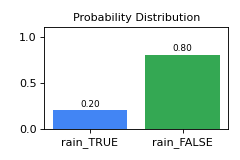
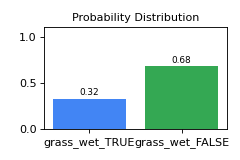
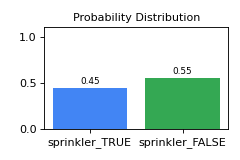

In [ ]:

from pyvis.network import Network
import networkx as nx
from IPython.display import HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import base64

def create_bayesian_network_with_probabilities(df):
    """
    Create an interactive Bayesian network visualization with probability information
    displayed in tooltips and through visual encoding
    """
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes with proper attributes
    for idx, row in df.iterrows():
        title = row['Title']
        description = row['Description']

        # Process probability information
        priors = get_priors(row)
        instantiations = get_instantiations(row)

        # Add node with base information
        G.add_node(
            title,
            description=description,
            priors=priors,
            instantiations=instantiations,
            posteriors=get_posteriors(row)
        )

    # Add edges
    for idx, row in df.iterrows():
        child = row['Title']
        parents = get_parents(row)

        # Add edges from each parent to this child
        for parent in parents:
            if parent in G.nodes():
                G.add_edge(parent, child)

    # Create network visualization
    net = Network(notebook=True, directed=True, cdn_resources="in_line", height="600px", width="100%")

    # Configure physics for better layout
    net.force_atlas_2based(gravity=-50, spring_length=100, spring_strength=0.02)
    net.show_buttons(filter_=['physics'])

    # Add the graph to the network
    net.from_nx(G)

    # Enhance node appearance with probability information
    for node in net.nodes:
        node_id = node['id']
        node_data = G.nodes[node_id]

        # Create tooltip with probability information
        tooltip = create_tooltip(node_id, node_data)

        # Determine node color based on node type
        if list(G.predecessors(node_id)):  # Has parents
            if list(G.successors(node_id)):  # Also has children
                color = "#FBBC05"  # Orange for intermediate nodes
            else:
                color = "#34A853"  # Green for leaf nodes
        else:
            color = "#4285F4"  # Blue for root nodes

        # Set node attributes
        node['title'] = tooltip
        node['shape'] = 'box'
        node['color'] = color

        # Add marginal probability to label if available
        priors = node_data.get('priors', {})
        if priors and 'true_prob' in priors:
            prob = priors['true_prob']
            node['label'] = f"{node_id}\np={prob:.2f}"
        else:
            node['label'] = node_id

    # Save and read the HTML content
    html_file = "bayesian_network.html"
    net.save_graph(html_file)

    try:
        with open(html_file, "r") as f:
            html_content = f.read()
        return HTML(html_content)
    except Exception as e:
        return HTML(f"<p>Error rendering HTML: {str(e)}</p><p>The network visualization has been saved to '{html_file}'</p>")

def get_parents(row):
    """Extract parent nodes from row data, with safe handling for different data types"""
    if 'Parents' not in row:
        return []

    parents_data = row['Parents']

    # Handle NaN, None, or empty list (More robust)
    # Using any() or all() to resolve ambiguity
    if pd.isna(parents_data).any() or (isinstance(parents_data, (list, np.ndarray, str)) and (len(parents_data) == 0 or (isinstance(parents_data, str) and parents_data.strip() == ''))):
        return []

    # Handle different data types
    if isinstance(parents_data, list):
        # Return a list with NaN and empty strings removed
        return [p for p in parents_data if not pd.isna(p) and p != '']

    if isinstance(parents_data, str):
        if not parents_data.strip():
            return []

        # Remove brackets and split by comma, removing empty strings and NaN
        cleaned = parents_data.strip('[]"\'')
        if not cleaned:
            return []

        return [p.strip(' "\'') for p in cleaned.split(',') if p.strip() and not pd.isna(p)]

    # Default: empty list
    return []

def get_instantiations(row):
    """Extract instantiations with safe handling for different data types"""
    if 'instantiations' not in row:
        return ["TRUE", "FALSE"]

    inst_data = row['instantiations']

    # Handle NaN or None (Corrected condition)
    if pd.isna(inst_data).any():  # or pd.isnull(inst_data).any()
        return ["TRUE", "FALSE"]

    # ... (Rest of the function remains the same)

    # Handle different data types
    if isinstance(inst_data, list):
        return inst_data if inst_data else ["TRUE", "FALSE"]

    if isinstance(inst_data, str):
        if not inst_data.strip():
            return ["TRUE", "FALSE"]

        # Remove brackets and split by comma
        cleaned = inst_data.strip('[]"\'')
        if not cleaned:
            return ["TRUE", "FALSE"]

        return [i.strip(' "\'') for i in cleaned.split(',') if i.strip()]

    # Default
    return ["TRUE", "FALSE"]

def get_priors(row):
    """Extract prior probabilities with safe handling for different data types"""
    if 'priors' not in row:
        return {}

    priors_data = row['priors']

    # Handle NaN or None
    if pd.isna(priors_data):
        return {}

    result = {}

    # Handle dictionary
    if isinstance(priors_data, dict):
        result = priors_data
    # Handle string representation of dictionary
    elif isinstance(priors_data, str):
        if not priors_data.strip() or priors_data == '{}':
            return {}

        try:
            # Try to evaluate as Python literal
            result = eval(priors_data)
        except:
            # Simple parsing for items like {'p(TRUE)': '0.2', 'p(FALSE)': '0.8'}
            if '{' in priors_data and '}' in priors_data:
                content = priors_data[priors_data.find('{')+1:priors_data.rfind('}')]
                items = [item.strip() for item in content.split(',')]

                for item in items:
                    if ':' in item:
                        key, value = item.split(':', 1)
                        key = key.strip(' \'"')
                        value = value.strip(' \'"')
                        result[key] = value

    # Extract main probability for TRUE state
    instantiations = get_instantiations(row)
    true_state = instantiations[0] if instantiations else "TRUE"
    true_key = f"p({true_state})"

    if true_key in result:
        try:
            result['true_prob'] = float(result[true_key])
        except:
            pass

    return result

def get_posteriors(row):
    """Extract posterior probabilities with safe handling for different data types"""
    if 'posteriors' not in row:
        return {}

    posteriors_data = row['posteriors']

    # Handle NaN or None
    if pd.isna(posteriors_data):
        return {}

    result = {}

    # Handle dictionary
    if isinstance(posteriors_data, dict):
        result = posteriors_data
    # Handle string representation of dictionary
    elif isinstance(posteriors_data, str):
        if not posteriors_data.strip() or posteriors_data == '{}':
            return {}

        try:
            # Try to evaluate as Python literal
            result = eval(posteriors_data)
        except:
            # Simple parsing
            if '{' in posteriors_data and '}' in posteriors_data:
                content = posteriors_data[posteriors_data.find('{')+1:posteriors_data.rfind('}')]
                items = [item.strip() for item in content.split(',')]

                for item in items:
                    if ':' in item:
                        key, value = item.split(':', 1)
                        key = key.strip(' \'"')
                        value = value.strip(' \'"')
                        result[key] = value

    return result

def create_tooltip(node_id, node_data):
    """
    Create rich HTML tooltip with probability information
    """
    description = node_data.get('description', '')
    priors = node_data.get('priors', {})
    posteriors = node_data.get('posteriors', {})
    instantiations = node_data.get('instantiations', ["TRUE", "FALSE"])

    # Start building the HTML tooltip
    html = f"""
    <div style='max-width:350px; padding:10px; background-color:#f8f9fa; border-radius:5px; font-family:Arial, sans-serif;'>
        <h3 style='margin-top:0; color:#202124;'>{node_id}</h3>
        <p style='font-style:italic;'>{description}</p>
    """

    # Add chart if possible
    chart_html = create_simple_chart(node_id, priors, instantiations)
    if chart_html:
        html += f"""
        <div style='margin:10px 0; text-align:center;'>
            {chart_html}
        </div>
        """

    # Add prior probabilities section
    if priors:
        html += """
        <div style='margin-top:10px; background-color:#fff; padding:8px; border-radius:4px; border:1px solid #ddd;'>
            <h4 style='margin-top:0; font-size:14px;'>Prior Probabilities:</h4>
            <table style='width:100%; border-collapse:collapse;'>
                <tr style='background-color:#f1f3f4;'>
                    <th style='padding:4px; text-align:left; border:1px solid #ddd;'>State</th>
                    <th style='padding:4px; text-align:right; border:1px solid #ddd;'>Probability</th>
                </tr>
        """

        for i, state in enumerate(instantiations):
            key = f"p({state})"
            if key in priors:
                value = priors[key]
                try:
                    prob = float(value)
                    # Add visualization bar
                    html += f"""
                    <tr>
                        <td style='padding:4px; border:1px solid #ddd;'>{state}</td>
                        <td style='padding:4px; text-align:right; border:1px solid #ddd;'>
                            <div style='background:#e8f0fe; width:100%; height:18px; position:relative;'>
                                <div style='position:absolute; height:100%; width:{prob*100}%; background:#4285f4;'></div>
                                <span style='position:relative; z-index:1;'>{value}</span>
                            </div>
                        </td>
                    </tr>
                    """
                except:
                    html += f"""
                    <tr>
                        <td style='padding:4px; border:1px solid #ddd;'>{state}</td>
                        <td style='padding:4px; text-align:right; border:1px solid #ddd;'>{value}</td>
                    </tr>
                    """

        html += """
            </table>
        </div>
        """

    # Add conditional probabilities section (simplified)
    if posteriors:
        html += """
        <div style='margin-top:10px; background-color:#fff; padding:8px; border-radius:4px; border:1px solid #ddd;'>
            <h4 style='margin-top:0; font-size:14px;'>Conditional Probabilities:</h4>
            <div style='max-height:150px; overflow-y:auto;'>
                <table style='width:100%; border-collapse:collapse;'>
                    <tr style='background-color:#f1f3f4;'>
                        <th style='padding:4px; text-align:left; border:1px solid #ddd;'>Condition</th>
                        <th style='padding:4px; text-align:right; border:1px solid #ddd;'>Value</th>
                    </tr>
        """

        # Add first few conditional probabilities
        for i, (key, value) in enumerate(list(posteriors.items())[:8]):
            html += f"""
            <tr>
                <td style='padding:4px; border:1px solid #ddd;'>{key}</td>
                <td style='padding:4px; text-align:right; border:1px solid #ddd;'>{value}</td>
            </tr>
            """

        # Show if there are more
        if len(posteriors) > 8:
            html += f"""
            <tr>
                <td colspan='2' style='padding:4px; text-align:center; border:1px solid #ddd;'>
                    (+{len(posteriors) - 8} more)
                </td>
            </tr>
            """

        html += """
                </table>
            </div>
        </div>
        """

    # Close the main div
    html += "</div>"

    return html

def create_simple_chart(node_id, priors, instantiations):
    """
    Create a simple probability chart as an embedded image
    """
    # Check if we have necessary information
    if 'true_prob' not in priors:
        return ""

    try:
        # Set up the values for visualization
        labels = instantiations[:2]  # Use first two states
        values = []

        # Get probability for first state
        true_prob = priors['true_prob']
        values.append(true_prob)

        # Calculate second state probability
        if len(labels) > 1:
            values.append(1.0 - true_prob)

        # Create the chart
        plt.figure(figsize=(3, 2))
        bars = plt.bar(labels, values, color=['#4285F4', '#34A853'])

        # Add value labels
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                     f'{height:.2f}', ha='center', va='bottom', fontsize=8)

        plt.ylim(0, 1.1)
        plt.title(f"Probability Distribution", fontsize=10)
        plt.tight_layout()

        # Save to buffer
        buffer = io.BytesIO()
        plt.savefig(buffer, format='png', dpi=80)
        plt.close()

        # Convert to base64 for embedding
        buffer.seek(0)
        img_str = base64.b64encode(buffer.read()).decode('utf-8')

        return f'<img src="data:image/png;base64,{img_str}" style="max-width:100%;">'
    except Exception as e:
        # Return empty string if there's any error
        return ""

# Use the function to create and display the visualization
create_bayesian_network_with_probabilities(result_df)


## 4.1 Network Visualizer: Data (.csv) to DAGs of Dynamic Bayes Nets (.html)

### Step 2: Function to convert our extracted data to pgmpy BayesianModel

In [ ]:
def create_bayesian_network(df):
    '''
      Creates a pgmpy BayesianModel from extracted BayesDown dataArgs:
          df: DataFrame containing extracted BayesDown data

      Returns:
          model: A pgmpy BayesianModel instance or None if creation fails
    '''
    # Create an empty Bayesian Network
    edges = []

    # Add edges based on parent-child relationships
    for idx, row in df.iterrows():
        node = row['Title']
        parents = row['Parents']

        # Check if parents is a list or a string representation of a list
        if isinstance(parents, str):
            try:
                parents = eval(parents)  # Convert string representation to actual list
            except:
                parents = []

        if isinstance(parents, list) and parents:
            for parent in parents:
                edges.append((parent, node))

    # Create Bayesian Network with identified edges
    if not edges:
        print("Warning: No edges found in the data")
        return None

    model = BayesianNetwork(edges)
    print(f"Created Bayesian Network with edges: {edges}")

    # Add CPDs (Conditional Probability Distributions)
    for idx, row in df.iterrows():
        node = row['Title']

        # Extract variable states from instantiations
        instantiations = row['instantiations']
        if isinstance(instantiations, str):
            try:
                instantiations = eval(instantiations)  # Convert string representation to actual list
            except:
                instantiations = ["TRUE", "FALSE"]  # Default if conversion fails

        # Number of possible states for this variable
        var_states = len(instantiations) if isinstance(instantiations, list) else 2

        # Get parents
        parents = row['Parents']
        if isinstance(parents, str):
            try:
                parents = eval(parents)
            except:
                parents = []

        # If node has no parents, use prior probabilities
        if not parents or len(parents) == 0:
            priors = row['priors']
            if isinstance(priors, str):
                try:
                    priors = eval(priors)
                except:
                    priors = {}

            # Extract probability values
            prob_values = []
            if priors and isinstance(priors, dict):
                for state in instantiations:
                    key = f"p({state})"
                    if key in priors:
                        try:
                            prob_values.append(float(priors[key]))
                        except:
                            prob_values.append(0.5)  # Default if conversion fails
                    else:
                        prob_values.append(0.5)  # Default if key not found

            # If we don't have probabilities for all states or have none, use uniform distribution
            if len(prob_values) != var_states or not prob_values:
                prob_values = [1.0/var_states] * var_states

            # Create the CPD for a node with no parents
            cpd = TabularCPD(
                variable=node,
                variable_card=var_states,
                values=[prob_values],
                state_names={node: instantiations}
            )
            try:
                model.add_cpds(cpd)
                print(f"Added CPD for node {node} with no parents")
            except Exception as e:
                print(f"Error adding CPD for {node}: {e}")

        # If node has parents, use conditional probabilities
        else:
            posteriors = row['posteriors']
            if isinstance(posteriors, str):
                try:
                    posteriors = eval(posteriors)
                except:
                    posteriors = {}

            if posteriors and isinstance(posteriors, dict):
                # This is a more complex case - we need to organize conditional probabilities
                # based on parent configurations

                # Get parent instantiations
                parent_states = {}
                for parent in parents:
                    parent_row = df[df['Title'] == parent]
                    if not parent_row.empty:
                        parent_instantiations = parent_row.iloc[0]['instantiations']
                        if isinstance(parent_instantiations, str):
                            try:
                                parent_instantiations = eval(parent_instantiations)
                            except:
                                parent_instantiations = ["TRUE", "FALSE"]
                        parent_states[parent] = parent_instantiations
                    else:
                        parent_states[parent] = ["TRUE", "FALSE"]

                # Calculate parent cardinalities
                parent_cards = [len(parent_states[parent]) for parent in parents]

                # We need to convert the posteriors dict to the tabular format expected by pgmpy
                # This is a simplified example that assumes binary variables and a specific
                # format of the posteriors dict

                # For demonstration, we'll create a CPD with uniform conditional probabilities
                values = np.ones((var_states, np.prod(parent_cards))) / var_states

                # In a real implementation, we would populate this based on the actual posteriors data
                # The exact implementation would depend on the specific format of your posteriors data

                cpd = TabularCPD(
                    variable=node,
                    variable_card=var_states,
                    values=values,
                    evidence=parents,
                    evidence_card=parent_cards,
                    state_names={node: instantiations}
                )

                try:
                    model.add_cpds(cpd)
                    print(f"Added CPD for node {node} with parents {parents}")
                except Exception as e:
                    print(f"Error adding CPD for {node}: {e}")

    # Check if the model is valid
    try:
        model.check_model()
        print("Model is valid")
        return model
    except Exception as e:
        print(f"Model validation failed: {e}")
        return None

### Step 3: Function to perform inference on the Bayesian Network

In [ ]:
def perform_inference(model, query_variables, evidence=None):
  """
  Performs inference on the Bayesian Network
  Args:
      model: pgmpy BayesianModel
      query_variables: List of variables to query
      evidence: Dictionary of evidence (variable: value)

  Returns:
      results: Dictionary of query results
  """
  if model is None:
      print("Error: No valid model provided for inference")
      return {}

  try:
      inference = VariableElimination(model)

      if evidence is None:
          evidence = {}

      results = {}
      for variable in query_variables:
          result = inference.query(variables=[variable], evidence=evidence)
          results[variable] = result

      return results
  except Exception as e:
      print(f"Inference error: {e}")
      return {}

### Step 4: Function to visualize the Bayesian Network

In [ ]:
def visualize_network(model, df):
  """
  Creates a visualization of the Bayesian Network
  Args:
      model: pgmpy BayesianModel
      df: DataFrame containing extracted BayesDown data

  Returns:
      Network object that can be displayed
  """
  if model is None:
      print("Error: No valid model provided for visualization")
      return None

  # Create a pyvis network
  net = Network(notebook=True, directed=True, height="500px", width="100%")

  # Add nodes
  for node in model.nodes():
      # Find the node in df to get additional info
      node_info = df[df['Title'] == node]
      if not node_info.empty:
          description = str(node_info.iloc[0]['Description'])

          # Truncate description for label if it's too long
          label = f"{node}\n{description[:30]}..." if len(description) > 30 else f"{node}\n{description}"

          # Add node with title (hover text) containing full description
          net.add_node(node, label=label, title=description, shape='box')
      else:
          net.add_node(node, label=node, shape='box')

  # Add edges
  for edge in model.edges():
      net.add_edge(edge[0], edge[1], arrows='to')

  # Set physics layout options for better visualization
  net.barnes_hut(gravity=-80000, central_gravity=0.3, spring_length=100, spring_strength=0.01, damping=0.09)

  return net

### Step 5: Function to visualize probability distributions

In [ ]:
def visualize_probabilities(results, variable):
  """
  Creates visualizations of probability distributions for a variable
  Args:
      results: Dictionary of inference results
      variable: The variable to visualize

  Returns:
      None (displays the visualization)
  """
  if not results or variable not in results:
      print(f"No results available for variable {variable}")
      return

  result = results[variable]

  # Extract the probability values
  probs = result.values
  states = result.state_names[variable]

  # Create a bar chart
  plt.figure(figsize=(10, 6))
  plt.bar(states, probs)
  plt.xlabel('States')
  plt.ylabel('Probability')
  plt.title(f'Probability Distribution for {variable}')
  plt.ylim(0, 1)

  for i, value in enumerate(probs):
      plt.text(i, value + 0.02, f'{value:.3f}', ha='center')

  plt.tight_layout()
  plt.show()

### 4.1.1 Visualize the Network
Visualize the network (PDF) using matplotlib and networkx.

In [ ]:
# Convert pgmpy DAG to a NetworkX graph for visualization
nx_graph = nx.DiGraph(model.edges())

pos = nx.nx_pydot.graphviz_layout(nx_dag, prog='dot')



# Plot the graph
plt.figure(figsize=(10, 7))
nx.draw(nx_graph, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
plt.title("DAG Visualization of Bayesian Network")
plt.show()

NameError: name 'model' is not defined

### 4.1.2 Display Graph in Colab as dynamic HTML

In [ ]:
from pyvis.network import Network
import networkx as nx
from IPython.display import HTML

# Create and configure the graph with Pyvis
nx_graph = nx.DiGraph(filtered_edges)
net = Network(notebook=True, directed=True, cdn_resources="in_line")
net.from_nx(nx_graph)
net.force_atlas_2based(gravity=-50)
net.show_buttons(filter_=['physics'])

# Save the HTML to a file
net.save_graph("interactive_dag.html")

# Read the HTML file contents and embed it directly
with open("interactive_dag.html", "r") as f:
    html_content = f.read()

# Display the graph as HTML
HTML(html_content)

ModuleNotFoundError: No module named 'pyvis'

# 5.0 Archive_version_histories

# 6.0 Save Outputs


## Convert ipynb to HTML in Colab

Instruction:

Download the ipynb, which you want to convert, on your local computer.
Run the code below to upload the ipynb.

The html version will be downloaded automatically on your local machine.
Enjoy it!

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")


Saving AMTAIR_Prototype_0_1.2.ipynb to AMTAIR_Prototype_0_1.2.ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>